# Step 2: Exploration Data Analysis

### Exploratory Data Analysis (EDA) is an approach for summarizing and visualizing the important characteristics and statistical properties of a dataset. Visualizing the data will help make sense of it to identify emerging themes. 

In [203]:
#Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import seaborn as sns

from sqlalchemy import create_engine

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import sqlite3
from sqlite3 import Error

import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler, PowerTransformer
from scipy.stats import linregress
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#Load the data

os.chdir("C:\\Users\\mohamed.ziane\\OneDrive - Slalom\\Documents\\GitHub\\Climate-Change-in-Kenya\\data\\Processed")

df = pd.read_csv('table_final.csv')

In [3]:
df.head()

,Unnamed: 0,timestamp,Year_extract,CO2 emissions from liquid fuel consumption (kt)_new,Energy related methane emissions (% of total)_new,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Mineral rents (% of GDP)_new,Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new,...,CT_Relative_Humidity_m,CT_Wind_Speed_10m,CT_Cloud_Cover_Total,CT_Sunshine_Duration,CT_Shortwave_Radiation,CT_Mean_Sea_Level_Pressure,CT_Soil_Temperature_10cm,CT_Soil_Moisture_10cm,CT_Wind_Direction_Dominant_10m,Year_extract_y
0,0,1985-09-01,1985,3115.498132,24.162338,16.476346,28.932601,4279.666073,1.365497,362.545871,...,99,4.457064,15.708333,675.834840,5135.3003,1017.0,75.560020,0.145,292.47943,1985
1,1,1985-09-02,1985,3118.855606,21.529548,18.765827,31.529024,4274.313711,0.703036,362.384262,...,96,7.161691,93.000000,95.744675,4807.7803,1015.1,67.046005,0.141,288.88968,1985
2,2,1985-09-03,1985,3119.868040,26.957457,12.745660,31.855229,4280.127290,-3.874296,361.687885,...,92,8.108701,65.666664,105.773056,2403.0000,1020.8,62.636032,0.137,305.56384,1985
3,3,1985-09-04,1985,3122.340297,22.117795,15.393883,30.340974,4279.056049,0.019061,364.689648,...,90,6.187060,52.820830,379.962770,5029.3896,1021.2,67.369990,0.140,245.22487,1985
4,4,1985-09-05,1985,3119.501944,20.538729,13.529428,30.462148,4279.879428,-1.444538,361.369231,...,100,7.644957,49.208332,423.075840,5007.1406,1023.0,69.944030,0.140,262.43716,1985


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12540 entries, 0 to 12539
Data columns (total 65 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Unnamed: 0                                                                             12540 non-null  int64  
 1   timestamp                                                                              12540 non-null  object 
 2   Year_extract                                                                           12540 non-null  int64  
 3   CO2 emissions from liquid fuel consumption (kt)_new                                    12540 non-null  float64
 4   Energy related methane emissions (% of total)_new                                      12540 non-null  float64
 5   Fuel exports (% of merchandise exports)_new                               

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp']);
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12540 entries, 0 to 12539
Data columns (total 65 columns):
 #   Column                                                                                 Non-Null Count  Dtype         
---  ------                                                                                 --------------  -----         
 0   Unnamed: 0                                                                             12540 non-null  int64         
 1   timestamp                                                                              12540 non-null  datetime64[ns]
 2   Year_extract                                                                           12540 non-null  int64         
 3   CO2 emissions from liquid fuel consumption (kt)_new                                    12540 non-null  float64       
 4   Energy related methane emissions (% of total)_new                                      12540 non-null  float64       
 5   Fuel exports (% of mercha

In [6]:
del df['Unnamed: 0']
df_newind = df.set_index('timestamp'); df.head()

,timestamp,Year_extract,CO2 emissions from liquid fuel consumption (kt)_new,Energy related methane emissions (% of total)_new,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Mineral rents (% of GDP)_new,Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Ores and metals exports (% of merchandise exports)_new,...,CT_Relative_Humidity_m,CT_Wind_Speed_10m,CT_Cloud_Cover_Total,CT_Sunshine_Duration,CT_Shortwave_Radiation,CT_Mean_Sea_Level_Pressure,CT_Soil_Temperature_10cm,CT_Soil_Moisture_10cm,CT_Wind_Direction_Dominant_10m,Year_extract_y
0,1985-09-01,1985,3115.498132,24.162338,16.476346,28.932601,4279.666073,1.365497,362.545871,1.829561,...,99,4.457064,15.708333,675.834840,5135.3003,1017.0,75.560020,0.145,292.47943,1985
1,1985-09-02,1985,3118.855606,21.529548,18.765827,31.529024,4274.313711,0.703036,362.384262,2.517605,...,96,7.161691,93.000000,95.744675,4807.7803,1015.1,67.046005,0.141,288.88968,1985
2,1985-09-03,1985,3119.868040,26.957457,12.745660,31.855229,4280.127290,-3.874296,361.687885,-1.140219,...,92,8.108701,65.666664,105.773056,2403.0000,1020.8,62.636032,0.137,305.56384,1985
3,1985-09-04,1985,3122.340297,22.117795,15.393883,30.340974,4279.056049,0.019061,364.689648,6.203908,...,90,6.187060,52.820830,379.962770,5029.3896,1021.2,67.369990,0.140,245.22487,1985
4,1985-09-05,1985,3119.501944,20.538729,13.529428,30.462148,4279.879428,-1.444538,361.369231,0.028296,...,100,7.644957,49.208332,423.075840,5007.1406,1023.0,69.944030,0.140,262.43716,1985


In [7]:
#Resampling from daily to yearly using average values of all variables

df_yearly_global_africa = df_newind.resample('Y').mean();
df_yearly_global_africa.info(); df_yearly_global_africa.head()
df_yearly_global_africa.to_csv('export_yearly.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 1985-12-31 to 2019-12-31
Freq: A-DEC
Data columns (total 63 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Year_extract                                                                           35 non-null     float64
 1   CO2 emissions from liquid fuel consumption (kt)_new                                    35 non-null     float64
 2   Energy related methane emissions (% of total)_new                                      35 non-null     float64
 3   Fuel exports (% of merchandise exports)_new                                            35 non-null     float64
 4   Fuel imports (% of merchandise imports)_new                                            35 non-null     float64
 5   Methane emissions in energy sector (thousand met

,Year_extract,CO2 emissions from liquid fuel consumption (kt)_new,Energy related methane emissions (% of total)_new,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Mineral rents (% of GDP)_new,Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Ores and metals exports (% of merchandise exports)_new,Total natural resources rents (% of GDP)_new,...,CT_Relative_Humidity_m,CT_Wind_Speed_10m,CT_Cloud_Cover_Total,CT_Sunshine_Duration,CT_Shortwave_Radiation,CT_Mean_Sea_Level_Pressure,CT_Soil_Temperature_10cm,CT_Soil_Moisture_10cm,CT_Wind_Direction_Dominant_10m,Year_extract_y
timestamp,,,,,,,,,,,,,,,,,,,,,
1985-12-31,1985.0,3116.933294,24.419251,16.049569,31.505091,4278.145456,-0.015081,362.178874,2.396915,3.192746,...,95.016393,9.856545,45.212022,446.193714,6282.655764,1017.871311,77.625582,0.109320,191.695491,1985.0
1986-12-31,1986.0,3281.817078,24.319500,11.553283,18.175905,4393.733877,-0.062012,375.487655,2.021242,3.975733,...,94.030137,9.215292,42.615491,428.197898,5049.318612,1019.435616,73.437291,0.147233,208.800921,1986.0
1987-12-31,1987.0,4272.021073,24.884067,13.490679,19.930905,4507.857144,-0.080505,385.947521,2.750079,3.675423,...,93.189041,9.194311,44.096473,418.626350,4921.980360,1019.724110,72.740469,0.151740,206.882772,1987.0
1988-12-31,1988.0,3868.764865,24.143494,13.340277,20.084218,4625.130141,0.033528,396.729916,2.747874,3.817580,...,93.822404,9.411680,43.629246,420.245241,5100.550996,1019.243716,73.238451,0.131284,207.867261,1988.0
1989-12-31,1989.0,4235.435713,23.840691,13.277840,19.945590,4743.716442,0.090388,411.688795,2.660007,4.279777,...,92.961644,9.116011,44.782135,406.449984,4956.802511,1019.145205,72.706886,0.156318,197.585987,1989.0


Text(0.5, 0, 'Time')

Text(0, 0.5, 'Temperatures, DegF')

Text(0.5, 1.0, 'Temperature variation for Algiers, Nairobi and Cape Town\n 1985 to 2019 ')

(69.0, 80.0)

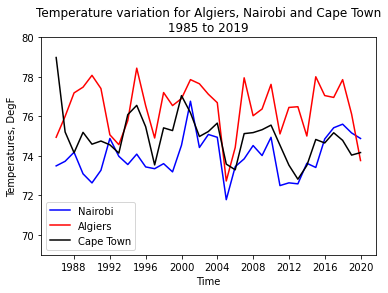

In [8]:
# Global Overview of temperature variation in Africa using data from the three main cities (Nairobi, Algiers and Cape Town)

fig, ax = plt.subplots()
ax.plot(df_yearly_global_africa.index, df_yearly_global_africa['N_Temperature_m'], color='blue', label = 'Nairobi')
ax.plot(df_yearly_global_africa.index, df_yearly_global_africa['A_Temperature_m'], color='red', label = 'Algiers')
ax.plot(df_yearly_global_africa.index, df_yearly_global_africa['CT_Temperature_m'], color='black', label = 'Cape Town')
ax.set_xlabel("Time")
ax.set_ylabel("Temperatures, DegF")
ax.set_title("Temperature variation for Algiers, Nairobi and Cape Town\n 1985 to 2019 ")
plt.legend()
plt.ylim((69, 80))
plt.show()

### As seen in the temperature graph above, the temperature variation above from 1985 to 2019 is consistent throughout the three cities (North to South). However, temperature variation is very hard to extract an obviou strend as temperature varies throughout seasons.

In [9]:
df_yearly_global_africa.columns

Index(['Year_extract', 'CO2 emissions from liquid fuel consumption (kt)_new',
       'Energy related methane emissions (% of total)_new',
       'Fuel exports (% of merchandise exports)_new',
       'Fuel imports (% of merchandise imports)_new',
       'Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new',
       'Mineral rents (% of GDP)_new',
       'Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new',
       'Ores and metals exports (% of merchandise exports)_new',
       'Total natural resources rents (% of GDP)_new',
       'Agricultural land (% of land area)_new',
       'Agricultural land (sq. km)_new',
       'Agriculture, forestry, and fishing, value added (% of GDP)_new',
       'Arable land (% of land area)_new', 'CO2 emissions (kt)_new',
       'CO2 emissions (metric tons per capita)_new',
       'Foreign direct investment, net inflows (% of GDP)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
     

In [10]:
df_yearly_n = df_yearly_global_africa[['Year_extract',
       'Fuel exports (% of merchandise exports)_new',
       'Fuel imports (% of merchandise imports)_new',
       'Mineral rents (% of GDP)_new',
       'Ores and metals exports (% of merchandise exports)_new',
       'Agricultural land (sq. km)_new', 'CO2 emissions (kt)_new',
       'Foreign direct investment, net inflows (% of GDP)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Mortality rate, under-5 (per 1,000 live births)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population growth (annual %)_new',
       'Population in urban agglomerations of more than 1 million (% of total population)_new',
       'Population, total_new',
       'Urban population_new', 'N_Temperature_m', 'N_Precipitation_Total', 'N_Relative_Humidity_m', 'N_Wind_Speed_10m',
       'N_Cloud_Cover_Total', 'N_Sunshine_Duration', 'N_Shortwave_Radiation',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Temperature_10cm',
       'N_Soil_Moisture_10cm', 'N_Wind_Direction_Dominant_10m']]

In [12]:
df_yearly_n.columns

Index(['Year_extract', 'Fuel exports (% of merchandise exports)_new',
       'Fuel imports (% of merchandise imports)_new',
       'Mineral rents (% of GDP)_new',
       'Ores and metals exports (% of merchandise exports)_new',
       'Agricultural land (sq. km)_new', 'CO2 emissions (kt)_new',
       'Foreign direct investment, net inflows (% of GDP)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Mortality rate, under-5 (per 1,000 live births)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population growth (annual %)_new',
       'Population in urban agglomerations of more than 1 million (% of total population)_new',
       'Population, total_new', 'Urban population_new', 'N_Temperature_m',
       'N_Precipitation_Total', 'N_Relative_Humidity_m', 'N_Wind_Speed_10m',
       'N_Cloud_Cover_Total', 'N_Sunshine_Duration', 'N_Shortwave_Radiation',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Temperature_10cm',
       'N_Soi

In [13]:
df_yearly_n.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 1985-12-31 to 2019-12-31
Freq: A-DEC
Data columns (total 26 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Year_extract                                                                           35 non-null     float64
 1   Fuel exports (% of merchandise exports)_new                                            35 non-null     float64
 2   Fuel imports (% of merchandise imports)_new                                            35 non-null     float64
 3   Mineral rents (% of GDP)_new                                                           35 non-null     float64
 4   Ores and metals exports (% of merchandise exports)_new                                 35 non-null     float64
 5   Agricultural land (sq. km)_new                  

In [14]:
df_yearly_n.reset_index(inplace=False)
df_yearly_n.head()

,timestamp,Year_extract,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Mineral rents (% of GDP)_new,Ores and metals exports (% of merchandise exports)_new,Agricultural land (sq. km)_new,CO2 emissions (kt)_new,"Foreign direct investment, net inflows (% of GDP)_new",Methane emissions (kt of CO2 equivalent)_new,...,N_Precipitation_Total,N_Relative_Humidity_m,N_Wind_Speed_10m,N_Cloud_Cover_Total,N_Sunshine_Duration,N_Shortwave_Radiation,N_Mean_Sea_Level_Pressure,N_Soil_Temperature_10cm,N_Soil_Moisture_10cm,N_Wind_Direction_Dominant_10m
0,1985-12-31,1985.0,16.049569,31.505091,-0.015081,2.396915,263539.772712,3769.475532,0.164350,17655.589742,...,0.010746,90.991803,11.101956,56.385246,390.020037,5206.842770,1016.884426,78.278155,0.185156,89.193956
1,1986-12-31,1986.0,11.553283,18.175905,-0.062012,2.021242,263730.129815,4162.057395,0.401157,17985.909700,...,0.048485,89.186301,9.981332,56.281610,362.851565,4917.710769,1017.015068,77.137254,0.187715,94.789442
2,1987-12-31,1987.0,13.490679,19.930905,-0.080505,2.750079,264350.127134,5174.149822,0.603448,18103.049231,...,0.026124,90.783562,10.073105,48.473973,414.414382,5085.708614,1017.226849,77.523438,0.190518,91.377100
3,1988-12-31,1988.0,13.340277,20.084218,0.033528,2.747874,266620.158277,4789.021959,0.004943,19137.800915,...,0.033228,90.371585,9.819856,58.558094,354.880393,4559.705777,1016.611749,76.145600,0.201754,95.228952
4,1989-12-31,1989.0,13.277840,19.945590,0.090388,2.660007,270529.987242,5192.579463,0.647776,19883.305509,...,0.036069,90.150685,9.963718,58.844555,342.414080,4610.768074,1016.810411,75.765948,0.202178,92.094229
5,1990-12-31,1990.0,13.040243,19.770593,-0.095770,2.957807,267699.897170,6140.039864,0.748281,21660.075591,...,0.030277,91.238356,9.724465,57.663710,371.834320,4859.502343,1017.284932,76.566186,0.206548,95.961479
6,1991-12-31,1991.0,16.655130,18.575444,0.121786,3.221316,268769.941115,5889.983525,0.106447,20999.962346,...,0.029360,89.295890,10.170460,50.800559,389.086611,5005.791494,1016.927123,78.381176,0.177222,90.650533
7,1992-12-31,1992.0,11.387196,25.084252,0.007624,2.305065,270719.815850,5949.998689,0.020647,20959.972008,...,0.030592,88.489071,10.285257,56.987921,353.106333,4761.283506,1017.085246,77.221174,0.183104,91.665360
8,1993-12-31,1993.0,9.280456,14.801531,-0.082873,2.713145,268399.867496,5859.847286,2.618321,20930.109545,...,0.020354,89.778082,10.461235,54.596107,375.589972,4896.677539,1017.299726,77.310597,0.179937,92.242360
9,1994-12-31,1994.0,4.115738,12.622990,0.071171,2.571512,272320.028580,5869.831985,-0.035838,21050.094016,...,0.062377,88.473973,10.060927,60.777591,320.928844,4633.847099,1016.754795,77.305812,0.190370,93.979601


,Year_extract,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Mineral rents (% of GDP)_new,Ores and metals exports (% of merchandise exports)_new,Agricultural land (sq. km)_new,CO2 emissions (kt)_new,"Foreign direct investment, net inflows (% of GDP)_new",Methane emissions (kt of CO2 equivalent)_new,"Mortality rate, under-5 (per 1,000 live births)_new",...,N_Precipitation_Total,N_Relative_Humidity_m,N_Wind_Speed_10m,N_Cloud_Cover_Total,N_Sunshine_Duration,N_Shortwave_Radiation,N_Mean_Sea_Level_Pressure,N_Soil_Temperature_10cm,N_Soil_Moisture_10cm,N_Wind_Direction_Dominant_10m
timestamp,,,,,,,,,,,,,,,,,,,,,
1985-12-31,1985.0,16.049569,31.505091,-0.015081,2.396915,263539.772712,3769.475532,0.164350,17655.589742,97.081484,...,0.010746,90.991803,11.101956,56.385246,390.020037,5206.842770,1016.884426,78.278155,0.185156,89.193956
1986-12-31,1986.0,11.553283,18.175905,-0.062012,2.021242,263730.129815,4162.057395,0.401157,17985.909700,96.050409,...,0.048485,89.186301,9.981332,56.281610,362.851565,4917.710769,1017.015068,77.137254,0.187715,94.789442
1987-12-31,1987.0,13.490679,19.930905,-0.080505,2.750079,264350.127134,5174.149822,0.603448,18103.049231,96.468244,...,0.026124,90.783562,10.073105,48.473973,414.414382,5085.708614,1017.226849,77.523438,0.190518,91.377100
1988-12-31,1988.0,13.340277,20.084218,0.033528,2.747874,266620.158277,4789.021959,0.004943,19137.800915,97.186201,...,0.033228,90.371585,9.819856,58.558094,354.880393,4559.705777,1016.611749,76.145600,0.201754,95.228952
1989-12-31,1989.0,13.277840,19.945590,0.090388,2.660007,270529.987242,5192.579463,0.647776,19883.305509,98.990194,...,0.036069,90.150685,9.963718,58.844555,342.414080,4610.768074,1016.810411,75.765948,0.202178,92.094229


In [15]:
df_yearly_n_T = df_yearly_n.T;
df_yearly_n_T.reset_index(inplace=True) ;
df_yearly_n.T

timestamp,1985-12-31,1986-12-31,1987-12-31,1988-12-31,1989-12-31,1990-12-31,1991-12-31,1992-12-31,1993-12-31,1994-12-31,...,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31
Year_extract,1.985000e+03,1.986000e+03,1.987000e+03,1.988000e+03,1.989000e+03,1.990000e+03,1.991000e+03,1.992000e+03,1.993000e+03,1.994000e+03,...,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03
Fuel exports (% of merchandise exports)_new,1.604957e+01,1.155328e+01,1.349068e+01,1.334028e+01,1.327784e+01,1.304024e+01,1.665513e+01,1.138720e+01,9.280456e+00,4.115738e+00,...,4.297120e+00,3.043768e+00,2.051718e+00,9.947085e-01,5.580473e+00,1.026316e+01,7.417148e+00,9.916695e-01,8.479189e-01,7.585859e+00
Fuel imports (% of merchandise imports)_new,3.150509e+01,1.817591e+01,1.993091e+01,2.008422e+01,1.994559e+01,1.977059e+01,1.857544e+01,2.508425e+01,1.480153e+01,1.262299e+01,...,2.211992e+01,2.253395e+01,2.302886e+01,2.371457e+01,1.964292e+01,1.544887e+01,1.489287e+01,1.622148e+01,1.956660e+01,1.928301e+01
Mineral rents (% of GDP)_new,-1.508066e-02,-6.201228e-02,-8.050536e-02,3.352751e-02,9.038830e-02,-9.577041e-02,1.217859e-01,7.623991e-03,-8.287332e-02,7.117124e-02,...,2.480548e-01,1.036306e-01,2.417875e-02,4.886462e-02,2.877731e-02,-1.295465e-01,1.292895e-01,-1.288420e-02,-1.087772e-01,8.699180e-01
Ores and metals exports (% of merchandise exports)_new,2.396915e+00,2.021242e+00,2.750079e+00,2.747874e+00,2.660007e+00,2.957807e+00,3.221316e+00,2.305065e+00,2.713145e+00,2.571512e+00,...,1.896995e+00,2.030022e+00,2.042705e+00,2.215690e+00,2.207102e+00,4.172245e+00,4.218130e+00,5.206584e+00,5.987358e+00,4.911944e+00
Agricultural land (sq. km)_new,2.635398e+05,2.637301e+05,2.643501e+05,2.666202e+05,2.705300e+05,2.676999e+05,2.687699e+05,2.707198e+05,2.683999e+05,2.723200e+05,...,2.732001e+05,2.763001e+05,2.772999e+05,2.763000e+05,2.763000e+05,2.762999e+05,2.762999e+05,2.763000e+05,2.762999e+05,2.763008e+05
CO2 emissions (kt)_new,3.769476e+03,4.162057e+03,5.174150e+03,4.789022e+03,5.192579e+03,6.140040e+03,5.889984e+03,5.949999e+03,5.859847e+03,5.869832e+03,...,1.263993e+04,1.303004e+04,1.212996e+04,1.409999e+04,1.502996e+04,1.708994e+04,1.876999e+04,1.888984e+04,1.839998e+04,1.840113e+04
"Foreign direct investment, net inflows (% of GDP)_new",1.643496e-01,4.011566e-01,6.034481e-01,4.942835e-03,6.477764e-01,7.482807e-01,1.064473e-01,2.064721e-02,2.618321e+00,-3.583812e-02,...,4.150560e-01,3.385679e+00,2.931068e+00,2.093233e+00,1.253100e+00,9.661174e-01,8.407310e-01,1.670462e+00,1.737891e+00,1.145702e+00
Methane emissions (kt of CO2 equivalent)_new,1.765559e+04,1.798591e+04,1.810305e+04,1.913780e+04,1.988331e+04,2.166008e+04,2.099996e+04,2.095997e+04,2.093011e+04,2.105009e+04,...,3.475987e+04,3.593025e+04,3.619002e+04,3.613007e+04,3.699999e+04,3.789998e+04,4.048011e+04,3.863001e+04,4.025009e+04,4.025089e+04
"Mortality rate, under-5 (per 1,000 live births)_new",9.708148e+01,9.605041e+01,9.646824e+01,9.718620e+01,9.899019e+01,1.014725e+02,1.043733e+02,1.071098e+02,1.093500e+02,1.108059e+02,...,5.779735e+01,5.594954e+01,5.457057e+01,5.282636e+01,5.138275e+01,4.974180e+01,4.784683e+01,4.644423e+01,4.471946e+01,4.311543e+01


In [16]:
df_yearly_n
df_yearly_n.T

,Year_extract,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Mineral rents (% of GDP)_new,Ores and metals exports (% of merchandise exports)_new,Agricultural land (sq. km)_new,CO2 emissions (kt)_new,"Foreign direct investment, net inflows (% of GDP)_new",Methane emissions (kt of CO2 equivalent)_new,"Mortality rate, under-5 (per 1,000 live births)_new",...,N_Precipitation_Total,N_Relative_Humidity_m,N_Wind_Speed_10m,N_Cloud_Cover_Total,N_Sunshine_Duration,N_Shortwave_Radiation,N_Mean_Sea_Level_Pressure,N_Soil_Temperature_10cm,N_Soil_Moisture_10cm,N_Wind_Direction_Dominant_10m
timestamp,,,,,,,,,,,,,,,,,,,,,
1985-12-31,1985.0,16.049569,31.505091,-0.015081,2.396915,263539.772712,3769.475532,0.164350,17655.589742,97.081484,...,0.010746,90.991803,11.101956,56.385246,390.020037,5206.842770,1016.884426,78.278155,0.185156,89.193956
1986-12-31,1986.0,11.553283,18.175905,-0.062012,2.021242,263730.129815,4162.057395,0.401157,17985.909700,96.050409,...,0.048485,89.186301,9.981332,56.281610,362.851565,4917.710769,1017.015068,77.137254,0.187715,94.789442
1987-12-31,1987.0,13.490679,19.930905,-0.080505,2.750079,264350.127134,5174.149822,0.603448,18103.049231,96.468244,...,0.026124,90.783562,10.073105,48.473973,414.414382,5085.708614,1017.226849,77.523438,0.190518,91.377100
1988-12-31,1988.0,13.340277,20.084218,0.033528,2.747874,266620.158277,4789.021959,0.004943,19137.800915,97.186201,...,0.033228,90.371585,9.819856,58.558094,354.880393,4559.705777,1016.611749,76.145600,0.201754,95.228952
1989-12-31,1989.0,13.277840,19.945590,0.090388,2.660007,270529.987242,5192.579463,0.647776,19883.305509,98.990194,...,0.036069,90.150685,9.963718,58.844555,342.414080,4610.768074,1016.810411,75.765948,0.202178,92.094229
1990-12-31,1990.0,13.040243,19.770593,-0.095770,2.957807,267699.897170,6140.039864,0.748281,21660.075591,101.472544,...,0.030277,91.238356,9.724465,57.663710,371.834320,4859.502343,1017.284932,76.566186,0.206548,95.961479
1991-12-31,1991.0,16.655130,18.575444,0.121786,3.221316,268769.941115,5889.983525,0.106447,20999.962346,104.373328,...,0.029360,89.295890,10.170460,50.800559,389.086611,5005.791494,1016.927123,78.381176,0.177222,90.650533
1992-12-31,1992.0,11.387196,25.084252,0.007624,2.305065,270719.815850,5949.998689,0.020647,20959.972008,107.109829,...,0.030592,88.489071,10.285257,56.987921,353.106333,4761.283506,1017.085246,77.221174,0.183104,91.665360
1993-12-31,1993.0,9.280456,14.801531,-0.082873,2.713145,268399.867496,5859.847286,2.618321,20930.109545,109.350032,...,0.020354,89.778082,10.461235,54.596107,375.589972,4896.677539,1017.299726,77.310597,0.179937,92.242360


timestamp,1985-12-31,1986-12-31,1987-12-31,1988-12-31,1989-12-31,1990-12-31,1991-12-31,1992-12-31,1993-12-31,1994-12-31,...,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31
Year_extract,1.985000e+03,1.986000e+03,1.987000e+03,1.988000e+03,1.989000e+03,1.990000e+03,1.991000e+03,1.992000e+03,1.993000e+03,1.994000e+03,...,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03
Fuel exports (% of merchandise exports)_new,1.604957e+01,1.155328e+01,1.349068e+01,1.334028e+01,1.327784e+01,1.304024e+01,1.665513e+01,1.138720e+01,9.280456e+00,4.115738e+00,...,4.297120e+00,3.043768e+00,2.051718e+00,9.947085e-01,5.580473e+00,1.026316e+01,7.417148e+00,9.916695e-01,8.479189e-01,7.585859e+00
Fuel imports (% of merchandise imports)_new,3.150509e+01,1.817591e+01,1.993091e+01,2.008422e+01,1.994559e+01,1.977059e+01,1.857544e+01,2.508425e+01,1.480153e+01,1.262299e+01,...,2.211992e+01,2.253395e+01,2.302886e+01,2.371457e+01,1.964292e+01,1.544887e+01,1.489287e+01,1.622148e+01,1.956660e+01,1.928301e+01
Mineral rents (% of GDP)_new,-1.508066e-02,-6.201228e-02,-8.050536e-02,3.352751e-02,9.038830e-02,-9.577041e-02,1.217859e-01,7.623991e-03,-8.287332e-02,7.117124e-02,...,2.480548e-01,1.036306e-01,2.417875e-02,4.886462e-02,2.877731e-02,-1.295465e-01,1.292895e-01,-1.288420e-02,-1.087772e-01,8.699180e-01
Ores and metals exports (% of merchandise exports)_new,2.396915e+00,2.021242e+00,2.750079e+00,2.747874e+00,2.660007e+00,2.957807e+00,3.221316e+00,2.305065e+00,2.713145e+00,2.571512e+00,...,1.896995e+00,2.030022e+00,2.042705e+00,2.215690e+00,2.207102e+00,4.172245e+00,4.218130e+00,5.206584e+00,5.987358e+00,4.911944e+00
Agricultural land (sq. km)_new,2.635398e+05,2.637301e+05,2.643501e+05,2.666202e+05,2.705300e+05,2.676999e+05,2.687699e+05,2.707198e+05,2.683999e+05,2.723200e+05,...,2.732001e+05,2.763001e+05,2.772999e+05,2.763000e+05,2.763000e+05,2.762999e+05,2.762999e+05,2.763000e+05,2.762999e+05,2.763008e+05
CO2 emissions (kt)_new,3.769476e+03,4.162057e+03,5.174150e+03,4.789022e+03,5.192579e+03,6.140040e+03,5.889984e+03,5.949999e+03,5.859847e+03,5.869832e+03,...,1.263993e+04,1.303004e+04,1.212996e+04,1.409999e+04,1.502996e+04,1.708994e+04,1.876999e+04,1.888984e+04,1.839998e+04,1.840113e+04
"Foreign direct investment, net inflows (% of GDP)_new",1.643496e-01,4.011566e-01,6.034481e-01,4.942835e-03,6.477764e-01,7.482807e-01,1.064473e-01,2.064721e-02,2.618321e+00,-3.583812e-02,...,4.150560e-01,3.385679e+00,2.931068e+00,2.093233e+00,1.253100e+00,9.661174e-01,8.407310e-01,1.670462e+00,1.737891e+00,1.145702e+00
Methane emissions (kt of CO2 equivalent)_new,1.765559e+04,1.798591e+04,1.810305e+04,1.913780e+04,1.988331e+04,2.166008e+04,2.099996e+04,2.095997e+04,2.093011e+04,2.105009e+04,...,3.475987e+04,3.593025e+04,3.619002e+04,3.613007e+04,3.699999e+04,3.789998e+04,4.048011e+04,3.863001e+04,4.025009e+04,4.025089e+04
"Mortality rate, under-5 (per 1,000 live births)_new",9.708148e+01,9.605041e+01,9.646824e+01,9.718620e+01,9.899019e+01,1.014725e+02,1.043733e+02,1.071098e+02,1.093500e+02,1.108059e+02,...,5.779735e+01,5.594954e+01,5.457057e+01,5.282636e+01,5.138275e+01,4.974180e+01,4.784683e+01,4.644423e+01,4.471946e+01,4.311543e+01


In [17]:
df_yearly_n_T_clean=df_yearly_n_T.rename(columns = {"index":"Parameters"})


In [18]:
df_yearly_n_T_clean.head()
df_melt=pd.melt(df_yearly_n_T_clean, id_vars=['Parameters'])
df_melt.head()

timestamp,Parameters,1985-12-31 00:00:00,1986-12-31 00:00:00,1987-12-31 00:00:00,1988-12-31 00:00:00,1989-12-31 00:00:00,1990-12-31 00:00:00,1991-12-31 00:00:00,1992-12-31 00:00:00,1993-12-31 00:00:00,...,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,2018-12-31 00:00:00,2019-12-31 00:00:00
0,Year_extract,1985.000000,1986.000000,1987.000000,1988.000000,1989.000000,1990.000000,1991.000000,1992.000000,1993.000000,...,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000
1,Fuel exports (% of merchandise exports)_new,16.049569,11.553283,13.490679,13.340277,13.277840,13.040243,16.655130,11.387196,9.280456,...,4.297120,3.043768,2.051718,0.994708,5.580473,10.263163,7.417148,0.991669,0.847919,7.585859
2,Fuel imports (% of merchandise imports)_new,31.505091,18.175905,19.930905,20.084218,19.945590,19.770593,18.575444,25.084252,14.801531,...,22.119924,22.533953,23.028860,23.714568,19.642920,15.448866,14.892867,16.221477,19.566597,19.283006
3,Mineral rents (% of GDP)_new,-0.015081,-0.062012,-0.080505,0.033528,0.090388,-0.095770,0.121786,0.007624,-0.082873,...,0.248055,0.103631,0.024179,0.048865,0.028777,-0.129547,0.129290,-0.012884,-0.108777,0.869918
4,Ores and metals exports (% of merchandise expo...,2.396915,2.021242,2.750079,2.747874,2.660007,2.957807,3.221316,2.305065,2.713145,...,1.896995,2.030022,2.042705,2.215690,2.207102,4.172245,4.218130,5.206584,5.987358,4.911944


,Parameters,timestamp,value
0,Year_extract,1985-12-31,1985.000000
1,Fuel exports (% of merchandise exports)_new,1985-12-31,16.049569
2,Fuel imports (% of merchandise imports)_new,1985-12-31,31.505091
3,Mineral rents (% of GDP)_new,1985-12-31,-0.015081
4,Ores and metals exports (% of merchandise expo...,1985-12-31,2.396915


In [19]:
df_melt['Year'] = df_melt['timestamp'].apply(lambda t: t.year)
df_melt

,Parameters,timestamp,value,Year
0,Year_extract,1985-12-31,1985.000000,1985
1,Fuel exports (% of merchandise exports)_new,1985-12-31,16.049569,1985
2,Fuel imports (% of merchandise imports)_new,1985-12-31,31.505091,1985
3,Mineral rents (% of GDP)_new,1985-12-31,-0.015081,1985
4,Ores and metals exports (% of merchandise expo...,1985-12-31,2.396915,1985
...,...,...,...,...
905,N_Shortwave_Radiation,2019-12-31,4420.420249,2019
906,N_Mean_Sea_Level_Pressure,2019-12-31,1016.988493,2019
907,N_Soil_Temperature_10cm,2019-12-31,78.445679,2019
908,N_Soil_Moisture_10cm,2019-12-31,0.228049,2019


### Temperature variation does not seem to be an obvious factor to have a good understanding of possible climate changes. Let's identify which other factors had a significant increase from 1985 to 2019.

In [20]:
df_melt

,Parameters,timestamp,value,Year
0,Year_extract,1985-12-31,1985.000000,1985
1,Fuel exports (% of merchandise exports)_new,1985-12-31,16.049569,1985
2,Fuel imports (% of merchandise imports)_new,1985-12-31,31.505091,1985
3,Mineral rents (% of GDP)_new,1985-12-31,-0.015081,1985
4,Ores and metals exports (% of merchandise expo...,1985-12-31,2.396915,1985
...,...,...,...,...
905,N_Shortwave_Radiation,2019-12-31,4420.420249,2019
906,N_Mean_Sea_Level_Pressure,2019-12-31,1016.988493,2019
907,N_Soil_Temperature_10cm,2019-12-31,78.445679,2019
908,N_Soil_Moisture_10cm,2019-12-31,0.228049,2019


### Let's start by calculating the ratio of the temperature

In [21]:
def create_temp_ratio(d):
    y1985 = float(d['value'][d['Year'] == 1985])
    y2019 = float(d['value'][d['Year'] == 2019])
    ratio = [y2019/y1985]
    return ratio

In [22]:
create_temp_ratio(df_melt[df_melt['Parameters'] == 'N_Temperature_m'])

[1.0188636500852428]

In [23]:
# Creating a loop to calculate the ratios on other variables
final={}
for b in df_melt['Parameters']:
    par = df_melt[df_melt['Parameters']==b]
    final[b]=create_temp_ratio(par)
print(final)

{'Year_extract': [1.0171284634760704], 'Fuel exports (% of merchandise exports)_new': [0.47265188727551954], 'Fuel imports (% of merchandise imports)_new': [0.6120599924955662], 'Mineral rents (% of GDP)_new': [-57.68436391171631], 'Ores and metals exports (% of merchandise exports)_new': [2.049277105051767], 'Agricultural land (sq. km)_new': [1.048421739140985], 'CO2 emissions (kt)_new': [4.8816166789171], 'Foreign direct investment, net inflows (% of GDP)_new': [6.971124795297322], 'Methane emissions (kt of CO2 equivalent)_new': [2.2797819242059356], 'Mortality rate, under-5 (per 1,000 live births)_new': [0.44411589937190527], 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new': [2.303785669968178], 'Population growth (annual %)_new': [0.5653222498187517], 'Population in urban agglomerations of more than 1 million (% of total population)_new': [1.4917854826468162], 'Population, total_new': [2.644954473019388], 'Urban population_new': [4.5248319625999605], 'N_Temper

In [24]:
df_ratios = pd.DataFrame(final);
df_ratios
del df_ratios['Mineral rents (% of GDP)_new']

,Year_extract,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Mineral rents (% of GDP)_new,Ores and metals exports (% of merchandise exports)_new,Agricultural land (sq. km)_new,CO2 emissions (kt)_new,"Foreign direct investment, net inflows (% of GDP)_new",Methane emissions (kt of CO2 equivalent)_new,"Mortality rate, under-5 (per 1,000 live births)_new",...,N_Precipitation_Total,N_Relative_Humidity_m,N_Wind_Speed_10m,N_Cloud_Cover_Total,N_Sunshine_Duration,N_Shortwave_Radiation,N_Mean_Sea_Level_Pressure,N_Soil_Temperature_10cm,N_Soil_Moisture_10cm,N_Wind_Direction_Dominant_10m
0,1.017128,0.472652,0.61206,-57.684364,2.049277,1.048422,4.881617,6.971125,2.279782,0.444116,...,6.684931,0.987896,0.891629,1.046701,0.871808,0.848964,1.000102,1.00214,1.231662,0.999627


In [25]:
df_ratios_T = df_ratios.T

In [26]:
df_ratios=df_ratios_T.reset_index()

In [27]:
df_ratios.head(); df_ratios.columns

,index,0
0,Year_extract,1.017128
1,Fuel exports (% of merchandise exports)_new,0.472652
2,Fuel imports (% of merchandise imports)_new,0.612060
3,Ores and metals exports (% of merchandise expo...,2.049277
4,Agricultural land (sq. km)_new,1.048422


Index(['index', 0], dtype='object')

In [28]:
df_ratios.rename(columns={'index':'Parameters', 0:'2019_1985_Ratio'}, inplace=True)
df_ratios.head()

,Parameters,2019_1985_Ratio
0,Year_extract,1.017128
1,Fuel exports (% of merchandise exports)_new,0.472652
2,Fuel imports (% of merchandise imports)_new,0.612060
3,Ores and metals exports (% of merchandise expo...,2.049277
4,Agricultural land (sq. km)_new,1.048422


In [29]:
# Sorting the ratios by descending order
df_ratios_new = df_ratios.drop([0])
top10 = df_ratios_new.sort_values(by='2019_1985_Ratio', ascending=False).head(10)
print(top10)

                                           Parameters  2019_1985_Ratio
6   Foreign direct investment, net inflows (% of G...         6.971125
15                              N_Precipitation_Total         6.684931
5                              CO2 emissions (kt)_new         4.881617
13                               Urban population_new         4.524832
12                              Population, total_new         2.644954
9   Nitrous oxide emissions (thousand metric tons ...         2.303786
7        Methane emissions (kt of CO2 equivalent)_new         2.279782
3   Ores and metals exports (% of merchandise expo...         2.049277
11  Population in urban agglomerations of more tha...         1.491785
23                               N_Soil_Moisture_10cm         1.231662


[Text(0, 0, 'Foreign direct investment, net inflows (% of GDP)_new'),
 Text(1, 0, 'N_Precipitation_Total'),
 Text(2, 0, 'CO2 emissions (kt)_new'),
 Text(3, 0, 'Urban population_new'),
 Text(4, 0, 'Population, total_new'),
 Text(5, 0, 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new'),
 Text(6, 0, 'Methane emissions (kt of CO2 equivalent)_new'),
 Text(7, 0, 'Ores and metals exports (% of merchandise exports)_new'),
 Text(8, 0, 'Population in urban agglomerations of more than 1 million (% of total population)_new'),
 Text(9, 0, 'N_Soil_Moisture_10cm')]

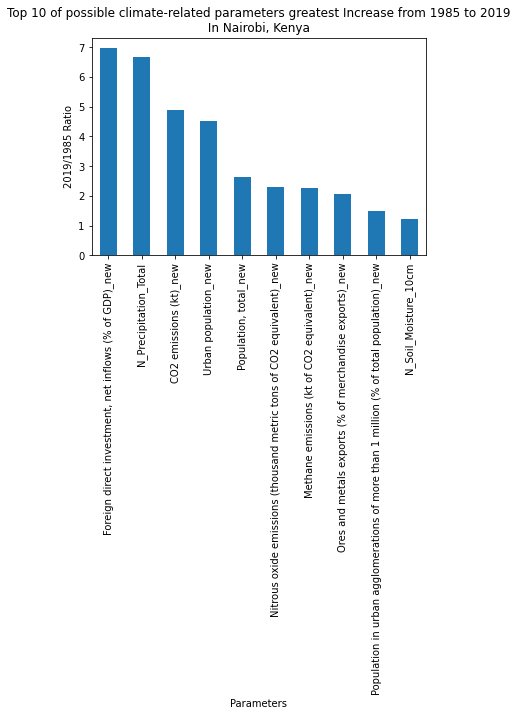

In [30]:
# Top 10 of possible climate-related parameters greatest Increase from 1985 to 2019 in Nairobi
ax = top10[['Parameters','2019_1985_Ratio']].plot(kind='bar', title="Top 10 of possible climate-related parameters greatest Increase from 1985 to 2019\n In Nairobi, Kenya ", xlabel="Parameters", ylabel="2019/1985 Ratio", legend=False)
ax.set_xticklabels(top10.Parameters)

In [31]:
# Bottom 10 of possible climate-related parameters greatest Increase from 1985 to 2019 In Nairobi, Kenya
bottom10 = df_ratios_new.sort_values(by='2019_1985_Ratio', ascending=False).tail(15)
print(bottom10)

                                           Parameters  2019_1985_Ratio
23                               N_Soil_Moisture_10cm         1.231662
4                      Agricultural land (sq. km)_new         1.048422
18                                N_Cloud_Cover_Total         1.046701
14                                    N_Temperature_m         1.018864
22                            N_Soil_Temperature_10cm         1.002140
21                          N_Mean_Sea_Level_Pressure         1.000102
24                      N_Wind_Direction_Dominant_10m         0.999627
16                              N_Relative_Humidity_m         0.987896
17                                   N_Wind_Speed_10m         0.891629
19                                N_Sunshine_Duration         0.871808
20                              N_Shortwave_Radiation         0.848964
2         Fuel imports (% of merchandise imports)_new         0.612060
10                   Population growth (annual %)_new         0.565322
1     

[Text(0, 0, 'N_Soil_Moisture_10cm'),
 Text(1, 0, 'Agricultural land (sq. km)_new'),
 Text(2, 0, 'N_Cloud_Cover_Total'),
 Text(3, 0, 'N_Temperature_m'),
 Text(4, 0, 'N_Soil_Temperature_10cm'),
 Text(5, 0, 'N_Mean_Sea_Level_Pressure'),
 Text(6, 0, 'N_Wind_Direction_Dominant_10m'),
 Text(7, 0, 'N_Relative_Humidity_m'),
 Text(8, 0, 'N_Wind_Speed_10m'),
 Text(9, 0, 'N_Sunshine_Duration'),
 Text(10, 0, 'N_Shortwave_Radiation'),
 Text(11, 0, 'Fuel imports (% of merchandise imports)_new'),
 Text(12, 0, 'Population growth (annual %)_new'),
 Text(13, 0, 'Fuel exports (% of merchandise exports)_new'),
 Text(14, 0, 'Mortality rate, under-5 (per 1,000 live births)_new')]

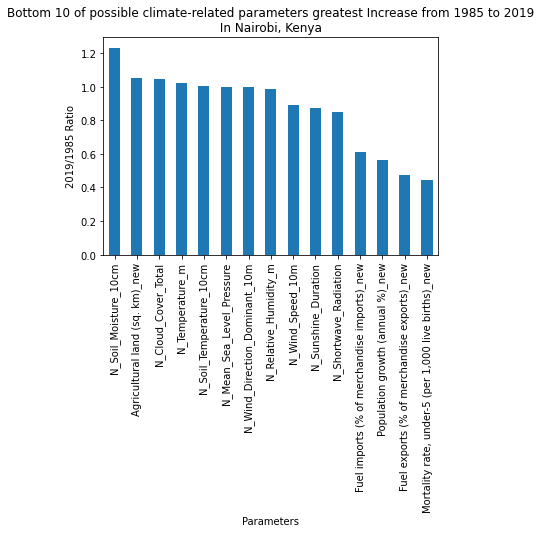

In [32]:
ax = bottom10[['Parameters','2019_1985_Ratio']].plot(kind='bar', title="Bottom 10 of possible climate-related parameters greatest Increase from 1985 to 2019\n In Nairobi, Kenya ", xlabel="Parameters", ylabel="2019/1985 Ratio", legend=False)
ax.set_xticklabels(bottom10.Parameters)

In [33]:
df_yearly_ratio = df_ratios_new.sort_values("2019_1985_Ratio", ascending=False)
df_yearly_ratio

,Parameters,2019_1985_Ratio
6,"Foreign direct investment, net inflows (% of G...",6.971125
15,N_Precipitation_Total,6.684931
5,CO2 emissions (kt)_new,4.881617
13,Urban population_new,4.524832
12,"Population, total_new",2.644954
9,Nitrous oxide emissions (thousand metric tons ...,2.303786
7,Methane emissions (kt of CO2 equivalent)_new,2.279782
3,Ores and metals exports (% of merchandise expo...,2.049277
11,Population in urban agglomerations of more tha...,1.491785
23,N_Soil_Moisture_10cm,1.231662


In [34]:
df_yearly_ratio.to_csv('df_yearly_ratio.csv')

In [35]:
# Creating a separate table for consequences
df_yearly_ratio_consequences = df_yearly_ratio[(df_yearly_ratio['Parameters'] == 'N_Precipitation_Total') | (df_yearly_ratio['Parameters'] == 'N_Soil_Moisture_10cm')
                                    | (df_yearly_ratio['Parameters'] == 'N_Cloud_Cover_Total') | (df_yearly_ratio['Parameters'] == 'N_Temperature_m')
                                        | (df_yearly_ratio['Parameters'] == 'N_Soil_Temperature_10cm') | (df_yearly_ratio['Parameters'] == 'N_Mean_Sea_Level_Pressure')
                                            | (df_yearly_ratio['Parameters'] == 'N_Wind_Direction_Dominant_10m') | (df_yearly_ratio['Parameters'] == 'N_Relative_Humidity_m')
                                               | (df_yearly_ratio['Parameters'] == 'N_Wind_Speed_10m') | (df_yearly_ratio['Parameters'] == 'N_Sunshine_Duration')
                                                  | (df_yearly_ratio['Parameters'] == 'N_Shortwave_Radiation') | (df_yearly_ratio['Parameters'] == 'N_Sunshine_Duration')
                                                       | (df_yearly_ratio['Parameters'] == 'Mortality rate, under-5 (per 1,000 live births)_new')
                                              
                                              
                                              ]
df_yearly_ratio_consequences['Status'] = 'Consequence'
df_yearly_ratio_consequences

<ipython-input-35-e9c7797f742f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearly_ratio_consequences['Status'] = 'Consequence'


,Parameters,2019_1985_Ratio,Status
15,N_Precipitation_Total,6.684931,Consequence
23,N_Soil_Moisture_10cm,1.231662,Consequence
18,N_Cloud_Cover_Total,1.046701,Consequence
14,N_Temperature_m,1.018864,Consequence
22,N_Soil_Temperature_10cm,1.002140,Consequence
21,N_Mean_Sea_Level_Pressure,1.000102,Consequence
24,N_Wind_Direction_Dominant_10m,0.999627,Consequence
16,N_Relative_Humidity_m,0.987896,Consequence
17,N_Wind_Speed_10m,0.891629,Consequence
19,N_Sunshine_Duration,0.871808,Consequence


[Text(0, 0, 'N_Precipitation_Total'),
 Text(1, 0, 'N_Soil_Moisture_10cm'),
 Text(2, 0, 'N_Cloud_Cover_Total'),
 Text(3, 0, 'N_Temperature_m'),
 Text(4, 0, 'N_Soil_Temperature_10cm'),
 Text(5, 0, 'N_Mean_Sea_Level_Pressure'),
 Text(6, 0, 'N_Wind_Direction_Dominant_10m'),
 Text(7, 0, 'N_Relative_Humidity_m'),
 Text(8, 0, 'N_Wind_Speed_10m'),
 Text(9, 0, 'N_Sunshine_Duration'),
 Text(10, 0, 'N_Shortwave_Radiation'),
 Text(11, 0, 'Mortality rate, under-5 (per 1,000 live births)_new')]

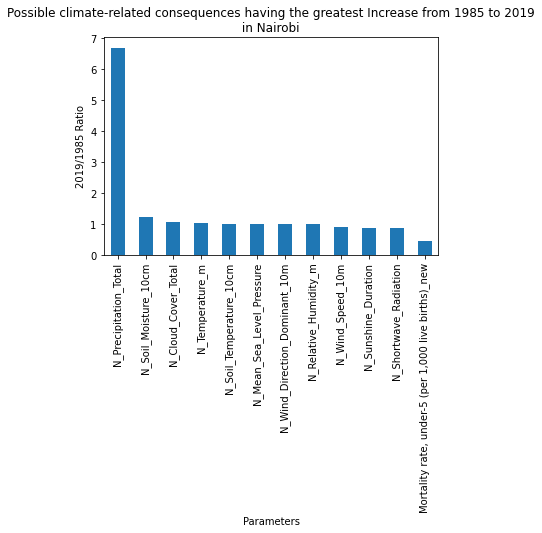

In [36]:
ax = df_yearly_ratio_consequences[['Parameters','2019_1985_Ratio']].plot(kind='bar', title="Possible climate-related consequences having the greatest Increase from 1985 to 2019\n in Nairobi ", xlabel="Parameters", ylabel="2019/1985 Ratio", legend=False)
ax.set_xticklabels(df_yearly_ratio_consequences.Parameters)

### We can see from the ratio chart above that the precipitation ratio has significantly increase in that time period.
This increase is more significant than the temperature

In [37]:
# Creating a separate table for the possible causes
df_yearly_ratio_causes = df_yearly_ratio[(df_yearly_ratio['Parameters'] == 'Foreign direct investment, net inflows (% of GDP)_new') | (df_yearly_ratio['Parameters'] == 'CO2 emissions (kt)_new')
                                    | (df_yearly_ratio['Parameters'] == 'Urban population_new') | (df_yearly_ratio['Parameters'] == 'Mineral rents (% of GDP)_new')
                                        | (df_yearly_ratio['Parameters'] == 'Population, total_new') | (df_yearly_ratio['Parameters'] == 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new')
                                            | (df_yearly_ratio['Parameters'] == 'Methane emissions (kt of CO2 equivalent)_new') | (df_yearly_ratio['Parameters'] == 'Ores and metals exports (% of merchandise exports)_new')
                                               | (df_yearly_ratio['Parameters'] == 'Population in urban agglomerations of more than 1 million (% of total population)_new') | (df_yearly_ratio['Parameters'] == 'Agricultural land (sq. km)_new')
                                                  | (df_yearly_ratio['Parameters'] == 'Fuel imports (% of merchandise imports)_new') | (df_yearly_ratio['Parameters'] == 'Population growth (annual %)_new')
                                                    | (df_yearly_ratio['Parameters'] == 'Fuel exports (% of merchandise exports)_new')
                                                                                                                                   
                                        ]
df_yearly_ratio_causes['Status'] = 'Cause'
df_yearly_ratio_causes
                                                                                                                                       

<ipython-input-37-8c0bc7d0778f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearly_ratio_causes['Status'] = 'Cause'


,Parameters,2019_1985_Ratio,Status
6,"Foreign direct investment, net inflows (% of G...",6.971125,Cause
5,CO2 emissions (kt)_new,4.881617,Cause
13,Urban population_new,4.524832,Cause
12,"Population, total_new",2.644954,Cause
9,Nitrous oxide emissions (thousand metric tons ...,2.303786,Cause
7,Methane emissions (kt of CO2 equivalent)_new,2.279782,Cause
3,Ores and metals exports (% of merchandise expo...,2.049277,Cause
11,Population in urban agglomerations of more tha...,1.491785,Cause
4,Agricultural land (sq. km)_new,1.048422,Cause
2,Fuel imports (% of merchandise imports)_new,0.612060,Cause


[Text(0, 0, 'Foreign direct investment, net inflows (% of GDP)_new'),
 Text(1, 0, 'CO2 emissions (kt)_new'),
 Text(2, 0, 'Urban population_new'),
 Text(3, 0, 'Population, total_new'),
 Text(4, 0, 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new'),
 Text(5, 0, 'Methane emissions (kt of CO2 equivalent)_new'),
 Text(6, 0, 'Ores and metals exports (% of merchandise exports)_new'),
 Text(7, 0, 'Population in urban agglomerations of more than 1 million (% of total population)_new'),
 Text(8, 0, 'Agricultural land (sq. km)_new'),
 Text(9, 0, 'Fuel imports (% of merchandise imports)_new'),
 Text(10, 0, 'Population growth (annual %)_new'),
 Text(11, 0, 'Fuel exports (% of merchandise exports)_new')]

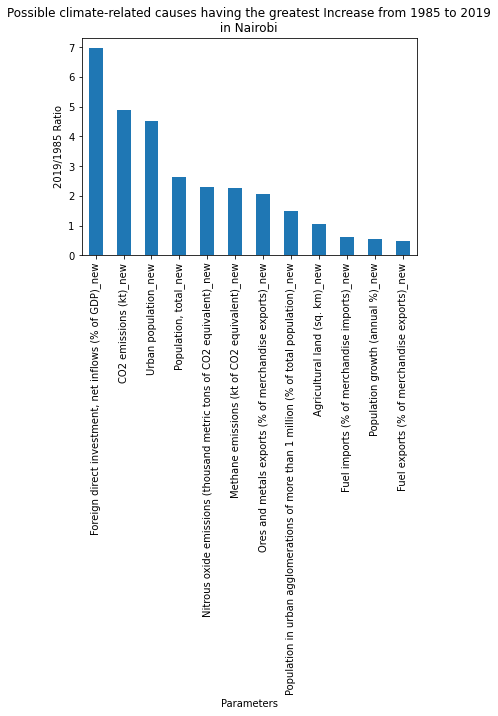

In [38]:
ax = df_yearly_ratio_causes[['Parameters','2019_1985_Ratio']].plot(kind='bar', title="Possible climate-related causes having the greatest Increase from 1985 to 2019\n in Nairobi ", xlabel="Parameters", ylabel="2019/1985 Ratio", legend=False)
ax.set_xticklabels(df_yearly_ratio_causes.Parameters)

### We can see from the ratio chart above that foreign direct investments, C02 emissions, and Urban Population  hold the top three of possible causes of climate change in Kenya


Text(0.5, 0, 'Time')

Text(0, 0.5, 'CO2 Emissions (kt)')

Text(0, 0.5, 'Relative Temperature (DegF)')

Text(0.5, 1.0, 'CO2 Emissions & Temperature Variation in Nairobi\n from 1985 to 2019')

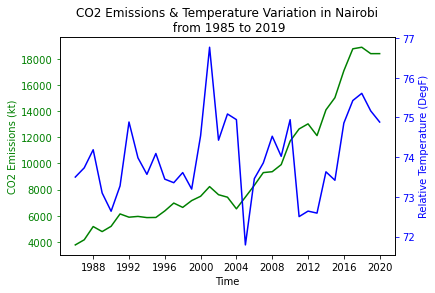

In [39]:
#CO2 Emmisions & Temperature Variation in Nairobi from 1985 to 2019

fig, ax = plt.subplots()
ax.plot(df_yearly_n.index, df_yearly_n['CO2 emissions (kt)_new'], color='green')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 Emissions (kt)', color='green')
ax.tick_params('y', colors="green")
ax2=ax.twinx()
ax2.plot(df_yearly_n.index, df_yearly_n['N_Temperature_m'], color='blue')
ax2.set_ylabel('Relative Temperature (DegF)', color='blue')
ax2.tick_params('y', colors="blue")
plt.title("CO2 Emissions & Temperature Variation in Nairobi\n from 1985 to 2019")
plt.show()


### The temperature is still very hard to link with C02 emmissions even though a direct relationship trend is noticeable

Text(0.5, 0, 'Time')

Text(0, 0.5, 'CO2 Emissions (kt)')

Text(0, 0.5, 'Relative Precipitation (in)')

Text(0.5, 1.0, 'CO2 Emissions & Precipitation Variation in Nairobi\n from 1985 to 2019')

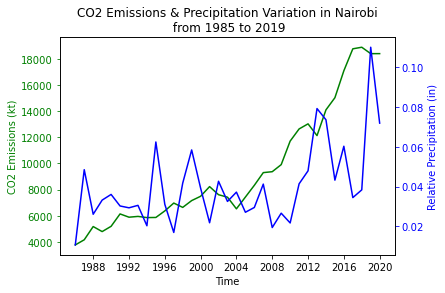

In [40]:
#CO2 Emmisions & Precipitation Variation in Nairobi from 1985 to 2019

fig, ax = plt.subplots()
ax.plot(df_yearly_n.index, df_yearly_n['CO2 emissions (kt)_new'], color='green')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 Emissions (kt)', color='green')
ax.tick_params('y', colors="green")
ax2=ax.twinx()
ax2.plot(df_yearly_n.index, df_yearly_n['N_Precipitation_Total'], color='blue')
ax2.set_ylabel('Relative Precipitation (in)', color='blue')
ax2.tick_params('y', colors="blue")
plt.title("CO2 Emissions & Precipitation Variation in Nairobi\n from 1985 to 2019")
plt.show()

### The precipitation seems to go hand in hand with the C02 emissions

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Foreign direct investment, net inflows (% of GDP)_new')

Text(0, 0.5, 'Relative Precipitation (in)')

Text(0.5, 1.0, 'Foreign direct investment & Precipitation Variation in Nairobi\n from 1985 to 2019')

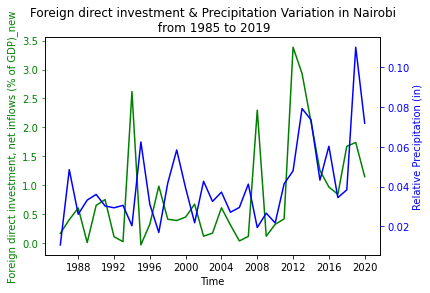

In [41]:
#CO2 Emmisions & Foreign Direct Investment Variation in Nairobi from 1985 to 2019

fig, ax = plt.subplots()
ax.plot(df_yearly_n.index, df_yearly_n['Foreign direct investment, net inflows (% of GDP)_new'], color='green')
ax.set_xlabel('Time')
ax.set_ylabel('Foreign direct investment, net inflows (% of GDP)_new', color='green')
ax.tick_params('y', colors="green")
ax2=ax.twinx()
ax2.plot(df_yearly_n.index, df_yearly_n['N_Precipitation_Total'], color='blue')
ax2.set_ylabel('Relative Precipitation (in)', color='blue')
ax2.tick_params('y', colors="blue")
plt.title("Foreign direct investment & Precipitation Variation in Nairobi\n from 1985 to 2019")
plt.show()

### There seems to be a direct correlation between foreign direct investments and increase of precipitation as well

In [42]:
del df_yearly_n['Year_extract']
df_yearly_n.head()

,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Mineral rents (% of GDP)_new,Ores and metals exports (% of merchandise exports)_new,Agricultural land (sq. km)_new,CO2 emissions (kt)_new,"Foreign direct investment, net inflows (% of GDP)_new",Methane emissions (kt of CO2 equivalent)_new,"Mortality rate, under-5 (per 1,000 live births)_new",Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,...,N_Precipitation_Total,N_Relative_Humidity_m,N_Wind_Speed_10m,N_Cloud_Cover_Total,N_Sunshine_Duration,N_Shortwave_Radiation,N_Mean_Sea_Level_Pressure,N_Soil_Temperature_10cm,N_Soil_Moisture_10cm,N_Wind_Direction_Dominant_10m
timestamp,,,,,,,,,,,,,,,,,,,,,
1985-12-31,16.049569,31.505091,-0.015081,2.396915,263539.772712,3769.475532,0.164350,17655.589742,97.081484,7956.928698,...,0.010746,90.991803,11.101956,56.385246,390.020037,5206.842770,1016.884426,78.278155,0.185156,89.193956
1986-12-31,11.553283,18.175905,-0.062012,2.021242,263730.129815,4162.057395,0.401157,17985.909700,96.050409,8221.354952,...,0.048485,89.186301,9.981332,56.281610,362.851565,4917.710769,1017.015068,77.137254,0.187715,94.789442
1987-12-31,13.490679,19.930905,-0.080505,2.750079,264350.127134,5174.149822,0.603448,18103.049231,96.468244,8209.241274,...,0.026124,90.783562,10.073105,48.473973,414.414382,5085.708614,1017.226849,77.523438,0.190518,91.377100
1988-12-31,13.340277,20.084218,0.033528,2.747874,266620.158277,4789.021959,0.004943,19137.800915,97.186201,8815.205261,...,0.033228,90.371585,9.819856,58.558094,354.880393,4559.705777,1016.611749,76.145600,0.201754,95.228952
1989-12-31,13.277840,19.945590,0.090388,2.660007,270529.987242,5192.579463,0.647776,19883.305509,98.990194,9127.566453,...,0.036069,90.150685,9.963718,58.844555,342.414080,4610.768074,1016.810411,75.765948,0.202178,92.094229


### Let's analyze other possible relationships by using correclations ans heatmaps vizualisations

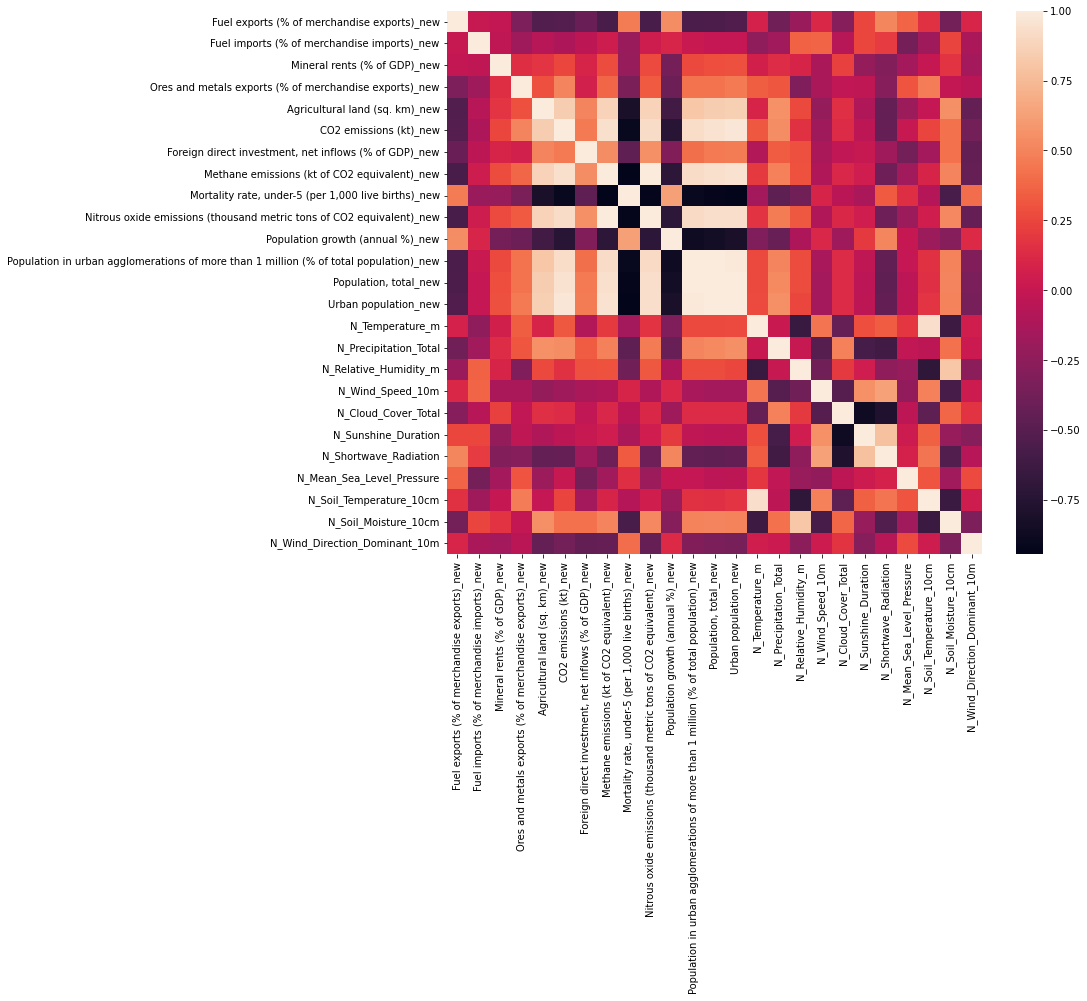

In [43]:
plt.subplots(figsize=(12,10))
sns.heatmap(df_yearly_n.corr());

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

Text(0.5, 1.0, 'Correlations in possible climate change parameters in Kenya\n From 1985 to 2019')

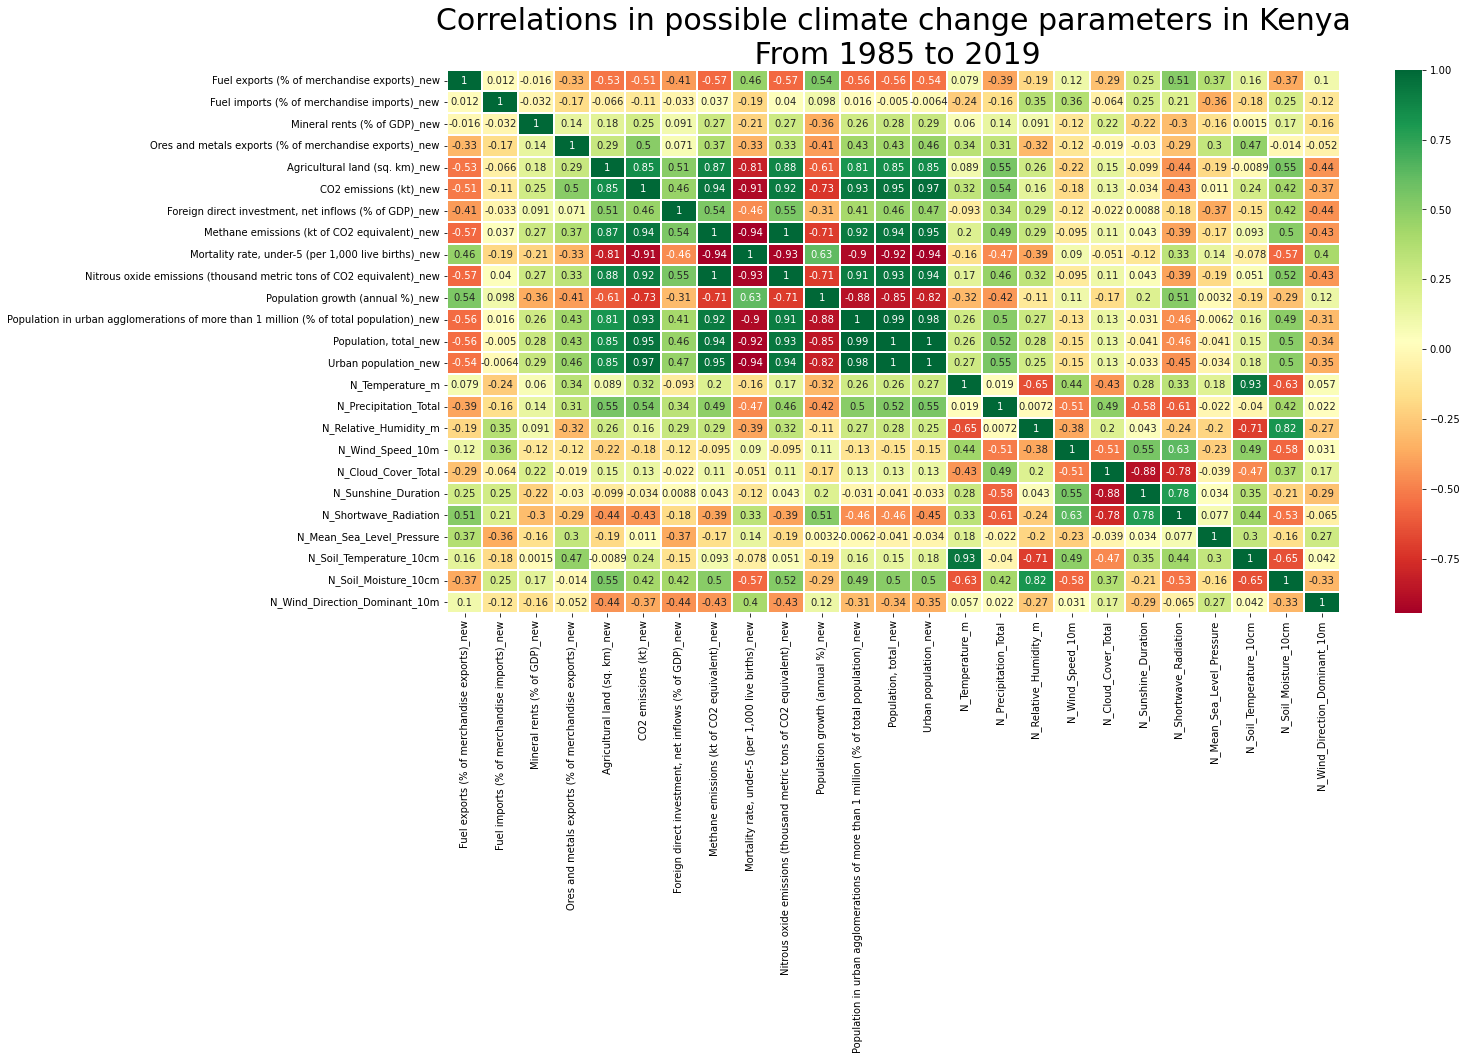

In [44]:
plt.subplots(figsize=(20,10))
sns.heatmap(df_yearly_n.corr(), linewidths=.1, annot=True, cmap='RdYlGn');
plt.title('Correlations in possible climate change parameters in Kenya\n From 1985 to 2019', fontsize=30)

### There are too many variables, let's filter by the most important ones based on the ratio classification

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

Text(0.5, 1.0, 'Highest Correlations in possible climate change parameters in Kenya\n From 1985 to 2019')

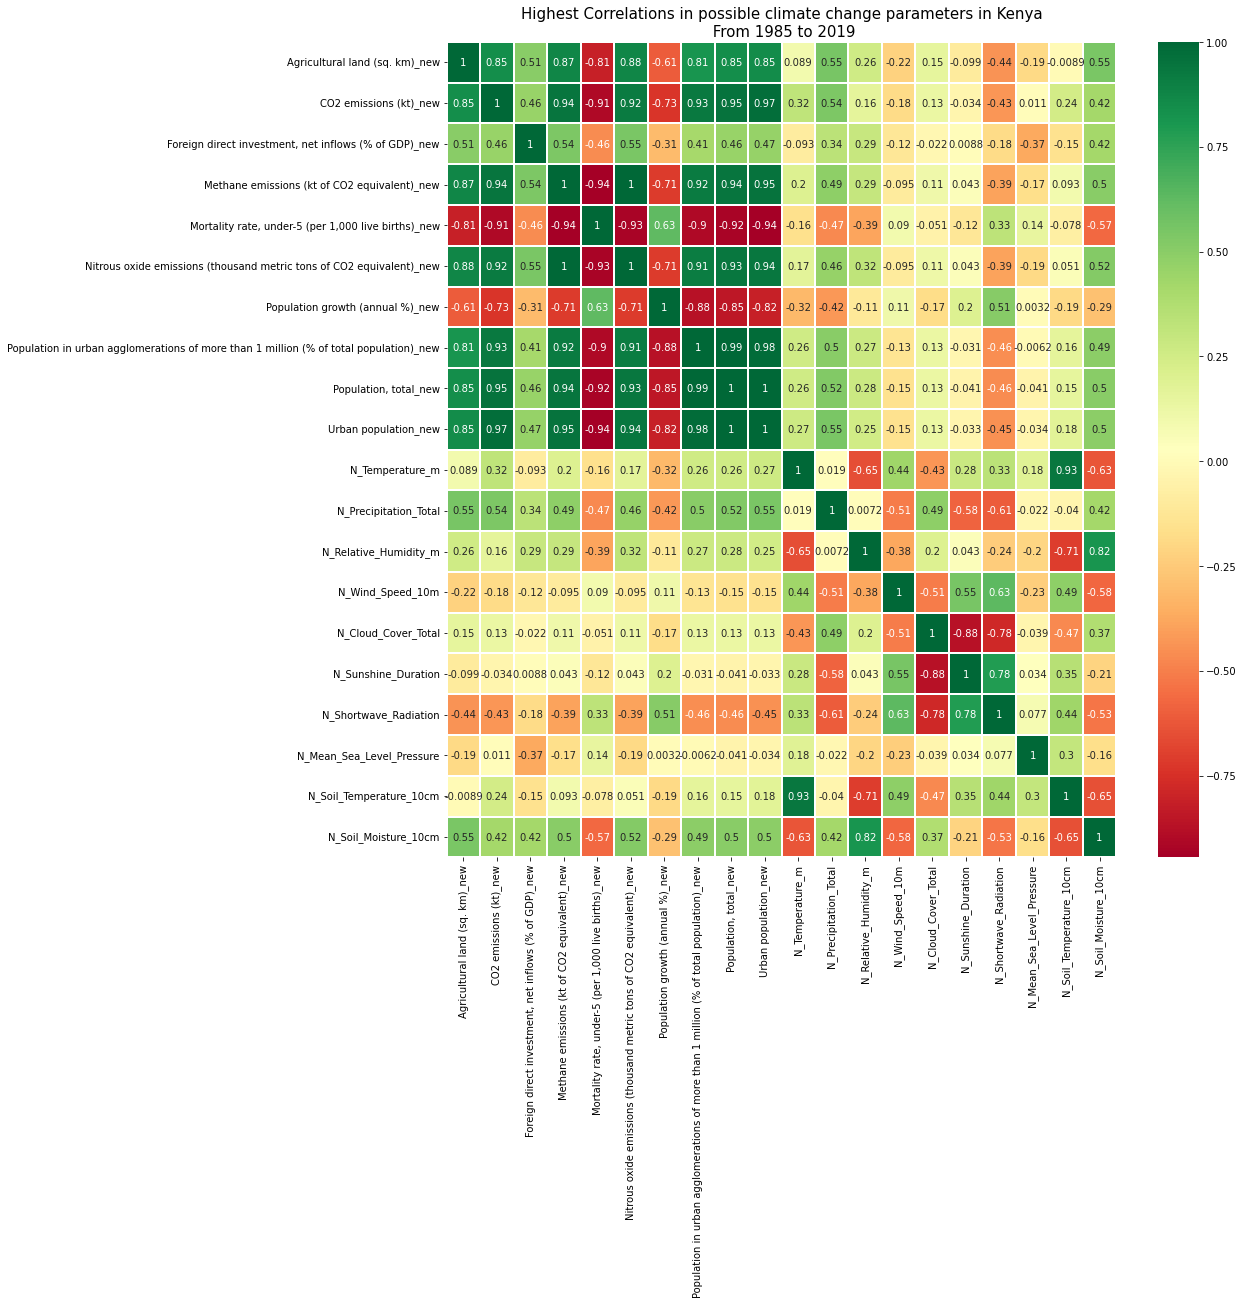

In [45]:
plt.subplots(figsize=(15,15))

sns.heatmap(df_yearly_n[['Agricultural land (sq. km)_new', 'CO2 emissions (kt)_new',
       'Foreign direct investment, net inflows (% of GDP)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Mortality rate, under-5 (per 1,000 live births)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population growth (annual %)_new',
       'Population in urban agglomerations of more than 1 million (% of total population)_new',
       'Population, total_new', 'Urban population_new', 'N_Temperature_m',
       'N_Precipitation_Total', 'N_Relative_Humidity_m', 'N_Wind_Speed_10m',
       'N_Cloud_Cover_Total', 'N_Sunshine_Duration', 'N_Shortwave_Radiation',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Temperature_10cm',
       'N_Soil_Moisture_10cm']].corr(), linewidths=.1, annot=True, cmap='RdYlGn');
plt.title('Highest Correlations in possible climate change parameters in Kenya\n From 1985 to 2019', fontsize=15)

### We can see better the possible correlations. Let's see some one-by-one relationships with scatterplots

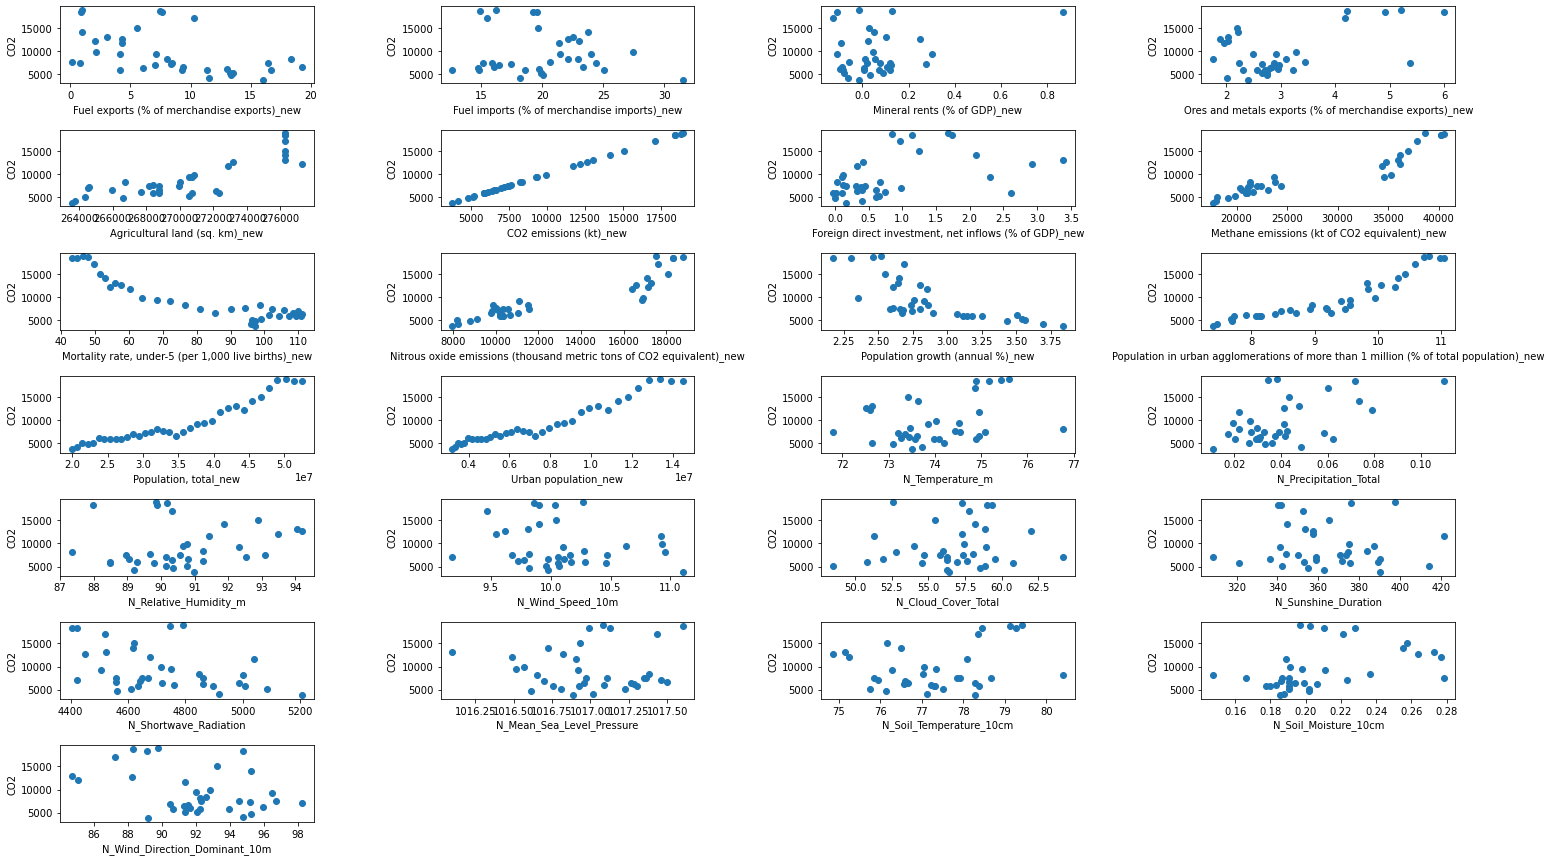

In [46]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'CO2 emissions (kt)_new', data=df_yearly_n, alpha=1)
        ax.set(xlabel=col, ylabel='CO2')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
features = [i for i in df_yearly_n.columns]

scatterplots(features, ncol=4, figsize=(25, 15))

### C02 seems to be more correlated with the following: the Total population, Urban population and Methane emissions and inversely related to the Mortaility rate (under 5). The latter is surprising? Or maybe because infants do not spend as much time outside as older people?

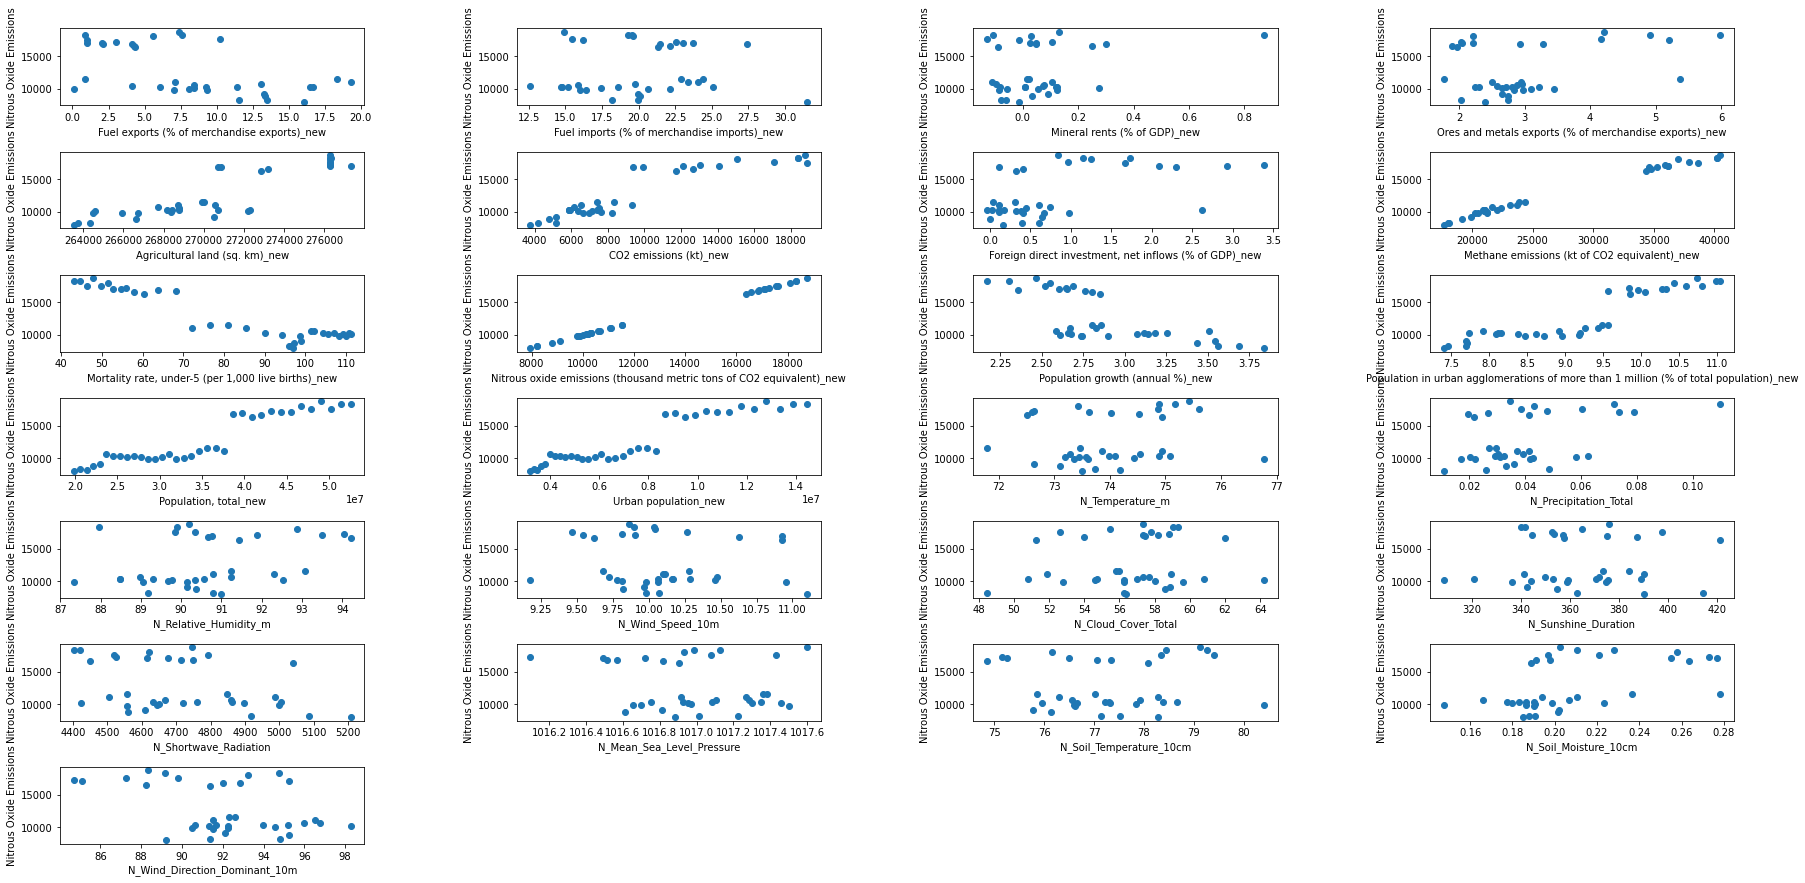

In [47]:
def scatterplots(columns, ncol=None, figsize=(30, 15)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new', data=df_yearly_n, alpha=1)
        ax.set(xlabel=col, ylabel='Nitrous Oxide Emissions')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
features = [i for i in df_yearly_n.columns]

scatterplots(features, ncol=4, figsize=(30, 15))

### Nitrous Oxide emissions see more correlations than C02: Agricultural Land (makes sense!), C02, Methane emissions, Population in urban agglomerations and the total population. Like C02, it is inversely related with the mortality rate (under 5).

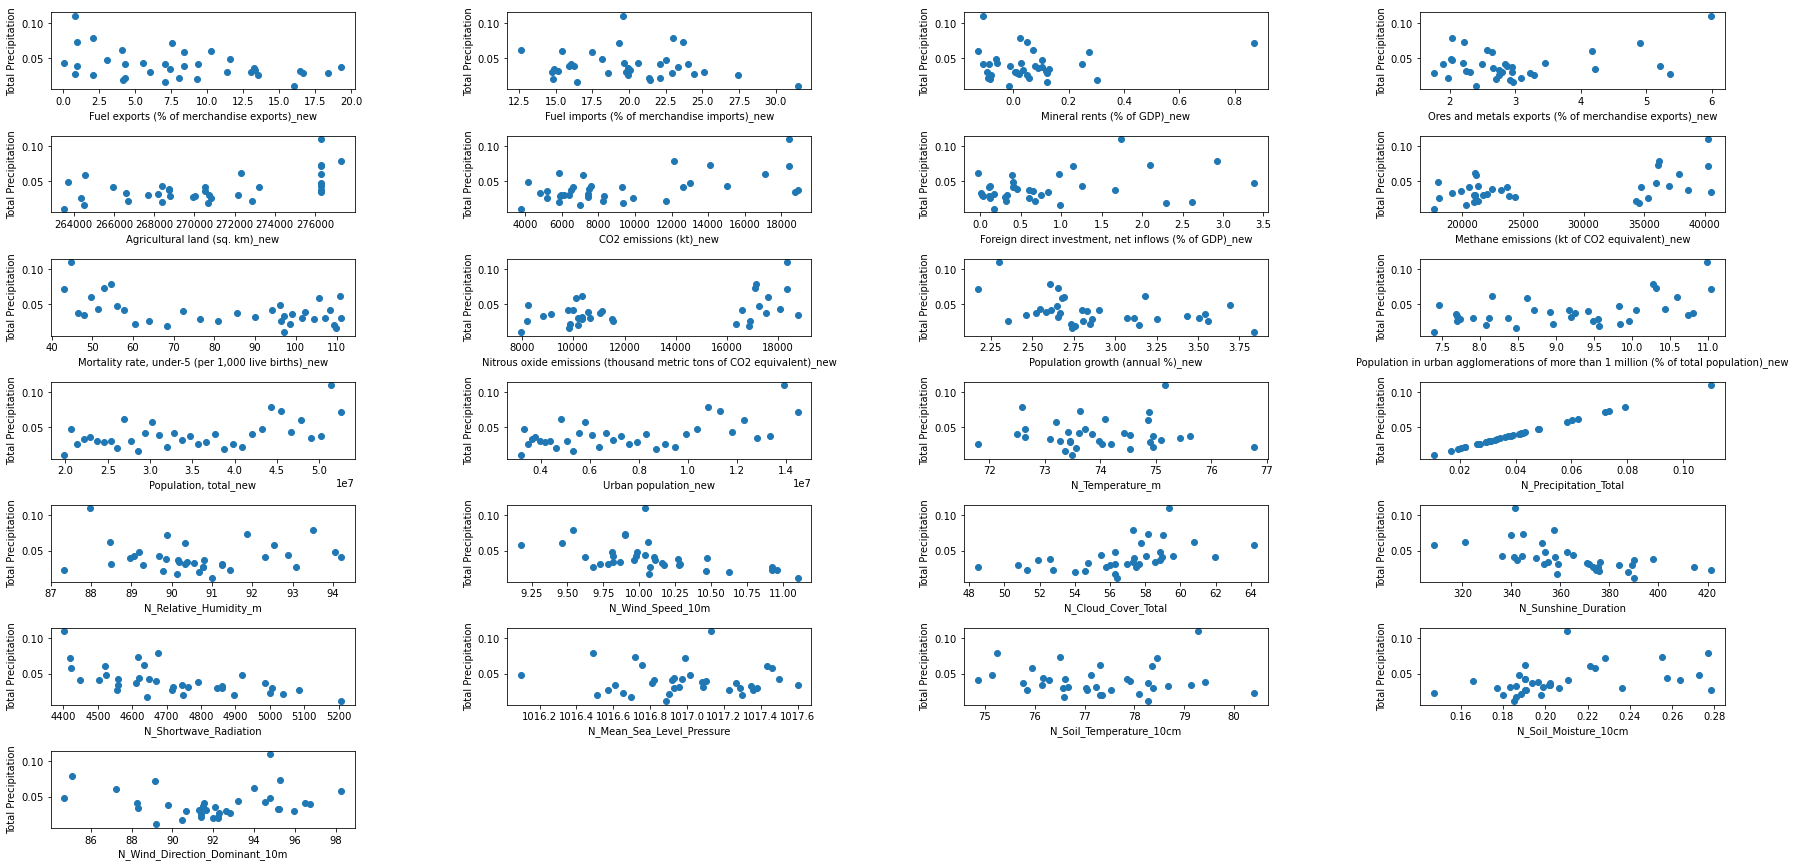

In [48]:
def scatterplots(columns, ncol=None, figsize=(30, 15)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'N_Precipitation_Total', data=df_yearly_n, alpha=1)
        ax.set(xlabel=col, ylabel='Total Precipitation')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
features = [i for i in df_yearly_n.columns]

scatterplots(features, ncol=4, figsize=(30, 15))

### Precipitation seems to be related to: Ores and metals exports, Agricultural land, CO2 emissions, Foreign direct investments, Methane emissions,  Nitrous Oxide emissions, Population in urban agglomerations, the total population, the total cloud cover and the soil moisture

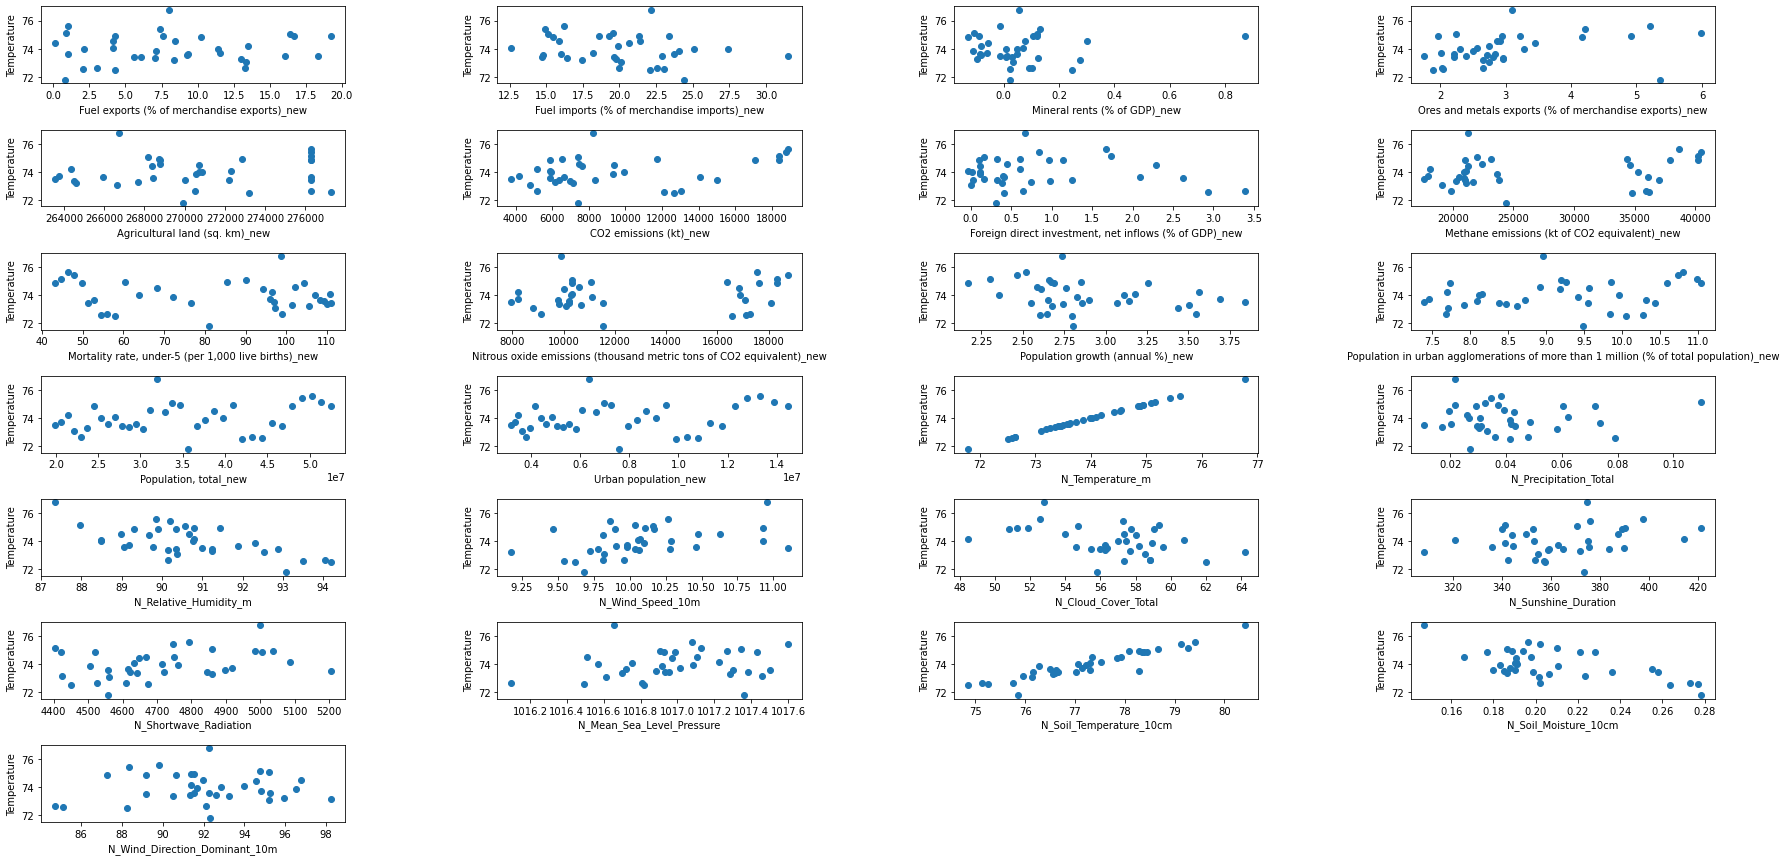

In [49]:
def scatterplots(columns, ncol=None, figsize=(30, 15)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'N_Temperature_m', data=df_yearly_n, alpha=1)
        ax.set(xlabel=col, ylabel='Temperature')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
features = [i for i in df_yearly_n.columns]

scatterplots(features, ncol=4, figsize=(30, 15))

### The temperature variation, as expected and seen before, is unfortunately hard to use to assess obvious relationships with other variables. However, we could see some positive relationships with: Ores and met als exports, C02 emissions, total population growth, urban population, Sunshine duration and Soil Temperature (the most obvious one!)

### Let's have a closer look at the correlations using the precipitation as the main variiable

LinregressResult(slope=2.371182217714307e-06, intercept=0.01795853449858985, rvalue=0.5372598279619416, pvalue=0.0008748785088858761, stderr=6.479863116687584e-07, intercept_stderr=0.0068073553331873685)

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Correlation Strength between the total precipitation and C02 emissions')

Text(0.5, 0, 'CO2 (kt)')

Text(0, 0.5, 'Total Precipitation (in)')

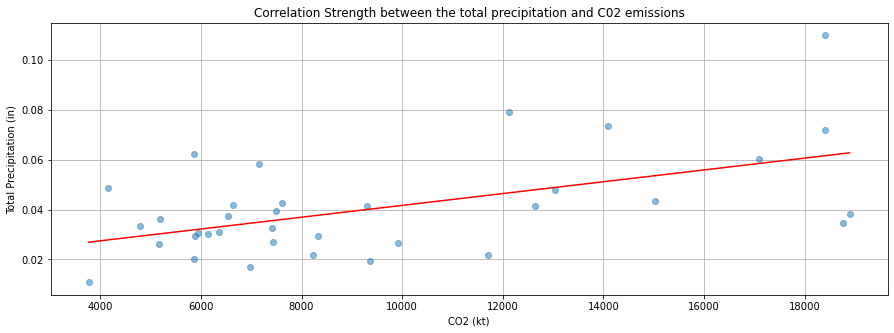

In [55]:
#Extract Variables to build Linear regression between the total precipitation and C02 emissions :
subset = df_yearly_n.dropna()
xs = subset['CO2 emissions (kt)_new']
ys = subset['N_Precipitation_Total']
#Compute the linear regression:
res = linregress(xs, ys)
res

#Plot the Scatter Plot:
plt.figure(figsize=(15, 5))
plt.plot(xs, ys, 'o', alpha=0.5)
plt.grid(True)

#Plot the Line of best fit:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, 'r-', alpha=1)

plt.title('Correlation Strength between the total precipitation and C02 emissions')


plt.xlabel('CO2 (kt)')
plt.ylabel('Total Precipitation (in)')

LinregressResult(slope=2.632941189196275e-06, intercept=-0.6719986810228485, rvalue=0.5539493575658563, pvalue=0.0005556442849356362, stderr=6.888499652414827e-07, intercept_stderr=0.18641449311207975)

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Correlation Strength between the total precipitation and Agricultural land')

Text(0.5, 0, 'Agricultural land (sq. km)')

Text(0, 0.5, 'Total Precipitation (in)')

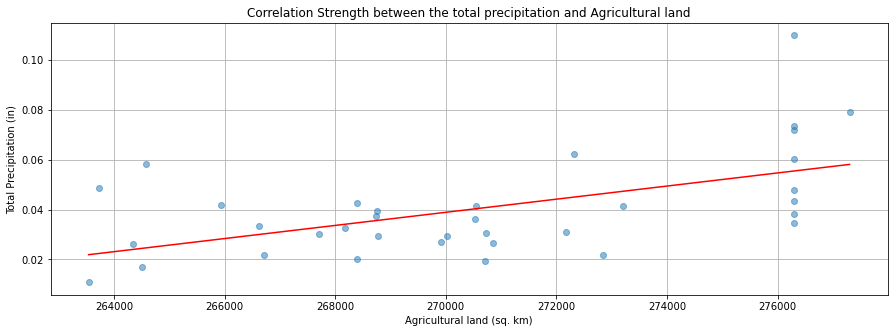

In [56]:
#Extract Variables to build Linear regression between the total precipitation and Agricultural land :
subset = df_yearly_n.dropna()
xs = subset['Agricultural land (sq. km)_new']
ys = subset['N_Precipitation_Total']
#Compute the linear regression:
res = linregress(xs, ys)
res

#Plot the Scatter Plot:
plt.figure(figsize=(15, 5))
plt.plot(xs, ys, 'o', alpha=0.5)
plt.grid(True)

#Plot the Line of best fit:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, 'r-', alpha=1)

plt.title('Correlation Strength between the total precipitation and Agricultural land')

#zoom-in to avoid outliers:
#plt.axis([0, 150, 0, 175])
plt.xlabel('Agricultural land (sq. km)')
plt.ylabel('Total Precipitation (in)')

LinregressResult(slope=1.218451285869099e-06, intercept=0.00753401942928613, rvalue=0.4853718518710992, pvalue=0.0031215671119012548, stderr=3.820682746165309e-07, intercept_stderr=0.010755759935910098)

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Correlation Strength between the total precipitation and Methane Emissions')

Text(0.5, 0, 'Methane emissions (kt of CO2 equivalent)')

Text(0, 0.5, 'Total Precipitation (in)')

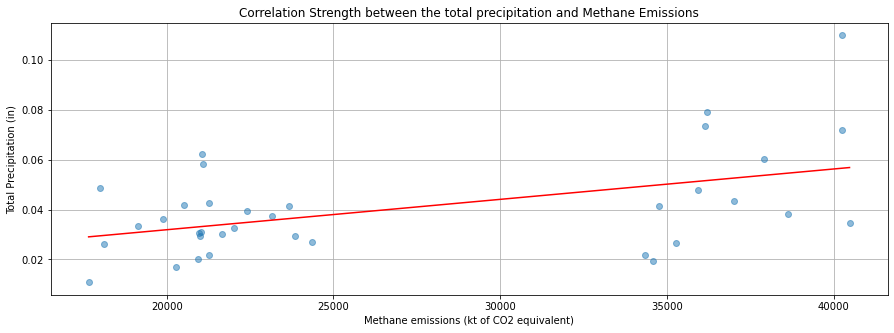

In [57]:
#Extract Variables to build Linear regression between the total precipitation and Methane Emissions :
subset = df_yearly_n.dropna()
xs = subset['Methane emissions (kt of CO2 equivalent)_new']
ys = subset['N_Precipitation_Total']
#Compute the linear regression:
res = linregress(xs, ys)
res

#Plot the Scatter Plot:
plt.figure(figsize=(15, 5))
plt.plot(xs, ys, 'o', alpha=0.5)
plt.grid(True)

#Plot the Line of best fit:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, 'r-', alpha=1)
#plt.text(100, 150, "slope=0.5, rvalue=0.76")
plt.title('Correlation Strength between the total precipitation and Methane Emissions')

#zoom-in to avoid outliers:
#plt.axis([0, 150, 0, 175])
plt.xlabel('Methane emissions (kt of CO2 equivalent)')
plt.ylabel('Total Precipitation (in)')

LinregressResult(slope=2.493115594541501e-06, intercept=0.00860018214122523, rvalue=0.4619840352716066, pvalue=0.005208224146937521, stderr=8.331580097607946e-07, intercept_stderr=0.011077029191975694)

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Correlation Strength between total precipitation and Nitrous Oxide Emissions')

Text(0.5, 0, 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)')

Text(0, 0.5, 'Total Precipitation (in)')

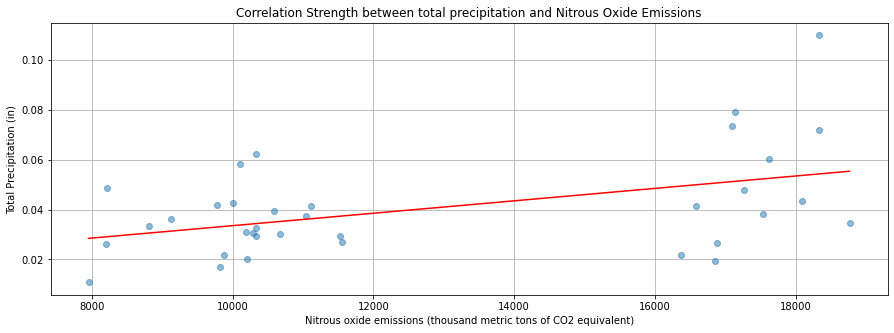

In [58]:
#Extract Variables to build Linear regression between total precipitation and Nitrous Oxide Emissions :
subset = df_yearly_n.dropna()
xs = subset['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new']
ys = subset['N_Precipitation_Total']
#Compute the linear regression:
res = linregress(xs, ys)
res

#Plot the Scatter Plot:
plt.figure(figsize=(15, 5))
plt.plot(xs, ys, 'o', alpha=0.5)
plt.grid(True)

#Plot the Line of best fit:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, 'r-', alpha=1)
#plt.text(100, 150, "slope=0.5, rvalue=0.76")
plt.title('Correlation Strength between total precipitation and Nitrous Oxide Emissions')

#zoom-in to avoid outliers:
#plt.axis([0, 150, 0, 175])
plt.xlabel('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)')
plt.ylabel('Total Precipitation (in)')

LinregressResult(slope=3.2714895563171193e-09, intercept=0.015528125165183444, rvalue=0.5470573206227102, pvalue=0.0006721335639604308, stderr=8.714260918496658e-10, intercept_stderr=0.00724565397251313)

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Correlation Strength between Ticket Price & Runs')

Text(0.5, 0, 'Urban population growth (% of total population)')

Text(0, 0.5, 'Total Precipitation (in)')

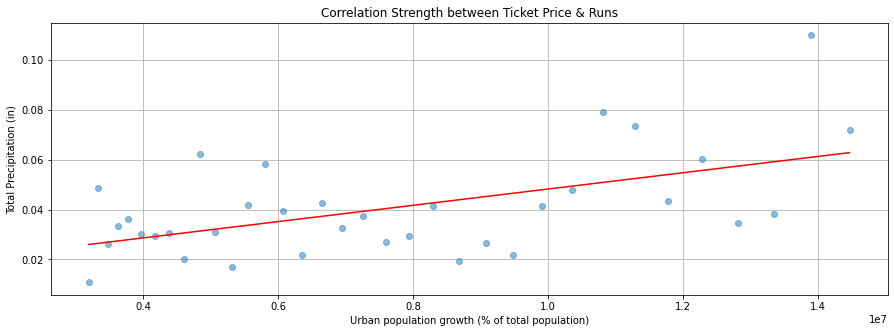

In [59]:
#Extract Variables to build Linear regression between total precipitation and urban population :
subset = df_yearly_n.dropna()
xs = subset['Urban population_new']
ys = subset['N_Precipitation_Total']
#Compute the linear regression:
res = linregress(xs, ys)
res

#Plot the Scatter Plot:
plt.figure(figsize=(15, 5))
plt.plot(xs, ys, 'o', alpha=0.5)
plt.grid(True)

#Plot the Line of best fit:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, 'r-', alpha=1)
#plt.text(100, 150, "slope=0.5, rvalue=0.76")
plt.title('Correlation Strength between Ticket Price & Runs')

#zoom-in to avoid outliers:
#plt.axis([0, 150, 0, 175])
plt.xlabel('Urban population growth (% of total population)')
plt.ylabel('Total Precipitation (in)')

### Let's standardize the data on the main features

In [60]:
#Save the data

os.chdir("C:\\Users\\mohamed.ziane\\OneDrive - Slalom\\Documents\\GitHub\\Climate-Change-in-Kenya\\data\\Processed")

df_yearly_n.to_csv('df_yearly_n.csv')
df.to_csv('df_daily_global_africa.csv')


# Step 3: Pre-Processing

In [61]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
import statsmodels.api as sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy.stats import linregress

In [62]:
df_yearly_n = pd.read_csv('df_yearly_n.csv')
df_daily_global_africa = pd.read_csv('df_daily_global_africa.csv')

In [63]:
df_yearly_n.info(); df_yearly_n.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 26 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   timestamp                                                                              35 non-null     object 
 1   Fuel exports (% of merchandise exports)_new                                            35 non-null     float64
 2   Fuel imports (% of merchandise imports)_new                                            35 non-null     float64
 3   Mineral rents (% of GDP)_new                                                           35 non-null     float64
 4   Ores and metals exports (% of merchandise exports)_new                                 35 non-null     float64
 5   Agricultural land (sq. km)_new                                                  

,timestamp,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Mineral rents (% of GDP)_new,Ores and metals exports (% of merchandise exports)_new,Agricultural land (sq. km)_new,CO2 emissions (kt)_new,"Foreign direct investment, net inflows (% of GDP)_new",Methane emissions (kt of CO2 equivalent)_new,"Mortality rate, under-5 (per 1,000 live births)_new",...,N_Precipitation_Total,N_Relative_Humidity_m,N_Wind_Speed_10m,N_Cloud_Cover_Total,N_Sunshine_Duration,N_Shortwave_Radiation,N_Mean_Sea_Level_Pressure,N_Soil_Temperature_10cm,N_Soil_Moisture_10cm,N_Wind_Direction_Dominant_10m
0,1985-12-31,16.049569,31.505091,-0.015081,2.396915,263539.772712,3769.475532,0.164350,17655.589742,97.081484,...,0.010746,90.991803,11.101956,56.385246,390.020037,5206.842770,1016.884426,78.278155,0.185156,89.193956
1,1986-12-31,11.553283,18.175905,-0.062012,2.021242,263730.129815,4162.057395,0.401157,17985.909700,96.050409,...,0.048485,89.186301,9.981332,56.281610,362.851565,4917.710769,1017.015068,77.137254,0.187715,94.789442
2,1987-12-31,13.490679,19.930905,-0.080505,2.750079,264350.127134,5174.149822,0.603448,18103.049231,96.468244,...,0.026124,90.783562,10.073105,48.473973,414.414382,5085.708614,1017.226849,77.523438,0.190518,91.377100
3,1988-12-31,13.340277,20.084218,0.033528,2.747874,266620.158277,4789.021959,0.004943,19137.800915,97.186201,...,0.033228,90.371585,9.819856,58.558094,354.880393,4559.705777,1016.611749,76.145600,0.201754,95.228952
4,1989-12-31,13.277840,19.945590,0.090388,2.660007,270529.987242,5192.579463,0.647776,19883.305509,98.990194,...,0.036069,90.150685,9.963718,58.844555,342.414080,4610.768074,1016.810411,75.765948,0.202178,92.094229


In [64]:
df_daily_global_africa.info(); 
del df_daily_global_africa['Unnamed: 0'] 
df_daily_global_africa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12540 entries, 0 to 12539
Data columns (total 65 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Unnamed: 0                                                                             12540 non-null  int64  
 1   timestamp                                                                              12540 non-null  object 
 2   Year_extract                                                                           12540 non-null  int64  
 3   CO2 emissions from liquid fuel consumption (kt)_new                                    12540 non-null  float64
 4   Energy related methane emissions (% of total)_new                                      12540 non-null  float64
 5   Fuel exports (% of merchandise exports)_new                               

,timestamp,Year_extract,CO2 emissions from liquid fuel consumption (kt)_new,Energy related methane emissions (% of total)_new,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Mineral rents (% of GDP)_new,Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Ores and metals exports (% of merchandise exports)_new,...,CT_Relative_Humidity_m,CT_Wind_Speed_10m,CT_Cloud_Cover_Total,CT_Sunshine_Duration,CT_Shortwave_Radiation,CT_Mean_Sea_Level_Pressure,CT_Soil_Temperature_10cm,CT_Soil_Moisture_10cm,CT_Wind_Direction_Dominant_10m,Year_extract_y
0,1985-09-01,1985,3115.498132,24.162338,16.476346,28.932601,4279.666073,1.365497,362.545871,1.829561,...,99,4.457064,15.708333,675.834840,5135.3003,1017.0,75.560020,0.145,292.47943,1985
1,1985-09-02,1985,3118.855606,21.529548,18.765827,31.529024,4274.313711,0.703036,362.384262,2.517605,...,96,7.161691,93.000000,95.744675,4807.7803,1015.1,67.046005,0.141,288.88968,1985
2,1985-09-03,1985,3119.868040,26.957457,12.745660,31.855229,4280.127290,-3.874296,361.687885,-1.140219,...,92,8.108701,65.666664,105.773056,2403.0000,1020.8,62.636032,0.137,305.56384,1985
3,1985-09-04,1985,3122.340297,22.117795,15.393883,30.340974,4279.056049,0.019061,364.689648,6.203908,...,90,6.187060,52.820830,379.962770,5029.3896,1021.2,67.369990,0.140,245.22487,1985
4,1985-09-05,1985,3119.501944,20.538729,13.529428,30.462148,4279.879428,-1.444538,361.369231,0.028296,...,100,7.644957,49.208332,423.075840,5007.1406,1023.0,69.944030,0.140,262.43716,1985


In [65]:
df_daily_global_africa['timestamp'] = pd.to_datetime(df_daily_global_africa['timestamp']);
df_daily_n = df_daily_global_africa[['timestamp',
       'Fuel exports (% of merchandise exports)_new',
       'Fuel imports (% of merchandise imports)_new',
       'Mineral rents (% of GDP)_new',
       'Ores and metals exports (% of merchandise exports)_new',
       'Agricultural land (sq. km)_new', 'CO2 emissions (kt)_new',
       'Foreign direct investment, net inflows (% of GDP)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Mortality rate, under-5 (per 1,000 live births)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population growth (annual %)_new',
       'Population in urban agglomerations of more than 1 million (% of total population)_new',
       'Population, total_new',
       'Urban population_new', 'N_Temperature_m', 'N_Precipitation_Total', 'N_Relative_Humidity_m', 'N_Wind_Speed_10m',
       'N_Cloud_Cover_Total', 'N_Sunshine_Duration', 'N_Shortwave_Radiation',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Temperature_10cm',
       'N_Soil_Moisture_10cm', 'N_Wind_Direction_Dominant_10m']];
df_daily_n.head(); df_daily_n.info()

,timestamp,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Mineral rents (% of GDP)_new,Ores and metals exports (% of merchandise exports)_new,Agricultural land (sq. km)_new,CO2 emissions (kt)_new,"Foreign direct investment, net inflows (% of GDP)_new",Methane emissions (kt of CO2 equivalent)_new,"Mortality rate, under-5 (per 1,000 live births)_new",...,N_Precipitation_Total,N_Relative_Humidity_m,N_Wind_Speed_10m,N_Cloud_Cover_Total,N_Sunshine_Duration,N_Shortwave_Radiation,N_Mean_Sea_Level_Pressure,N_Soil_Temperature_10cm,N_Soil_Moisture_10cm,N_Wind_Direction_Dominant_10m
0,1985-09-01,16.476346,28.932601,1.365497,1.829561,263539.836746,3768.928001,3.190965,17657.099043,96.950536,...,0.0,84,10.398747,93.291664,95.106384,3090.0800,1017.5,74.13800,0.172,112.53505
1,1985-09-02,18.765827,31.529024,0.703036,2.517605,263541.850657,3770.763728,-3.560668,17656.019487,96.734072,...,0.0,86,11.937781,86.625000,188.297870,3262.7397,1017.8,75.27202,0.172,110.25738
2,1985-09-03,12.745660,31.855229,-3.874296,-1.140219,263534.476745,3768.274402,-0.639366,17656.693362,97.193721,...,0.0,88,10.664815,96.625000,47.872337,3485.2400,1018.3,76.26199,0.193,108.77132
3,1985-09-04,15.393883,30.340974,0.019061,6.203908,263542.171340,3770.260578,-1.335888,17654.099834,93.197804,...,0.0,85,8.518000,94.166664,81.702126,2620.1597,1018.6,73.52602,0.202,107.01516
4,1985-09-05,13.529428,30.462148,-1.444538,0.028296,263536.351388,3771.964733,2.115213,17655.083125,98.020674,...,0.0,86,10.187275,68.375000,426.110630,4981.3300,1017.1,78.72798,0.202,106.76452


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12540 entries, 0 to 12539
Data columns (total 26 columns):
 #   Column                                                                                 Non-Null Count  Dtype         
---  ------                                                                                 --------------  -----         
 0   timestamp                                                                              12540 non-null  datetime64[ns]
 1   Fuel exports (% of merchandise exports)_new                                            12540 non-null  float64       
 2   Fuel imports (% of merchandise imports)_new                                            12540 non-null  float64       
 3   Mineral rents (% of GDP)_new                                                           12540 non-null  float64       
 4   Ores and metals exports (% of merchandise exports)_new                                 12540 non-null  float64       
 5   Agricultural land (sq. km

In [66]:
df_daily_n.set_index('timestamp', inplace=True)




In [67]:
df_daily_n.index = df_daily_n.index.normalize()
df_daily_n.head()
df_daily_n.columns

,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Mineral rents (% of GDP)_new,Ores and metals exports (% of merchandise exports)_new,Agricultural land (sq. km)_new,CO2 emissions (kt)_new,"Foreign direct investment, net inflows (% of GDP)_new",Methane emissions (kt of CO2 equivalent)_new,"Mortality rate, under-5 (per 1,000 live births)_new",Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,...,N_Precipitation_Total,N_Relative_Humidity_m,N_Wind_Speed_10m,N_Cloud_Cover_Total,N_Sunshine_Duration,N_Shortwave_Radiation,N_Mean_Sea_Level_Pressure,N_Soil_Temperature_10cm,N_Soil_Moisture_10cm,N_Wind_Direction_Dominant_10m
timestamp,,,,,,,,,,,,,,,,,,,,,
1985-09-01,16.476346,28.932601,1.365497,1.829561,263539.836746,3768.928001,3.190965,17657.099043,96.950536,7957.632802,...,0.0,84,10.398747,93.291664,95.106384,3090.0800,1017.5,74.13800,0.172,112.53505
1985-09-02,18.765827,31.529024,0.703036,2.517605,263541.850657,3770.763728,-3.560668,17656.019487,96.734072,7956.316590,...,0.0,86,11.937781,86.625000,188.297870,3262.7397,1017.8,75.27202,0.172,110.25738
1985-09-03,12.745660,31.855229,-3.874296,-1.140219,263534.476745,3768.274402,-0.639366,17656.693362,97.193721,7956.062528,...,0.0,88,10.664815,96.625000,47.872337,3485.2400,1018.3,76.26199,0.193,108.77132
1985-09-04,15.393883,30.340974,0.019061,6.203908,263542.171340,3770.260578,-1.335888,17654.099834,93.197804,7958.529672,...,0.0,85,8.518000,94.166664,81.702126,2620.1597,1018.6,73.52602,0.202,107.01516
1985-09-05,13.529428,30.462148,-1.444538,0.028296,263536.351388,3771.964733,2.115213,17655.083125,98.020674,7956.609886,...,0.0,86,10.187275,68.375000,426.110630,4981.3300,1017.1,78.72798,0.202,106.76452


Index(['Fuel exports (% of merchandise exports)_new',
       'Fuel imports (% of merchandise imports)_new',
       'Mineral rents (% of GDP)_new',
       'Ores and metals exports (% of merchandise exports)_new',
       'Agricultural land (sq. km)_new', 'CO2 emissions (kt)_new',
       'Foreign direct investment, net inflows (% of GDP)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Mortality rate, under-5 (per 1,000 live births)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population growth (annual %)_new',
       'Population in urban agglomerations of more than 1 million (% of total population)_new',
       'Population, total_new', 'Urban population_new', 'N_Temperature_m',
       'N_Precipitation_Total', 'N_Relative_Humidity_m', 'N_Wind_Speed_10m',
       'N_Cloud_Cover_Total', 'N_Sunshine_Duration', 'N_Shortwave_Radiation',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Temperature_10cm',
       'N_Soil_Moisture_10cm'

### Selecting the causes and consequences that had the highest correlations and significance

In [88]:
new_clt_climate_df = df_daily_n[['CO2 emissions (kt)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population, total_new', 'N_Temperature_m', 
       'N_Precipitation_Total'

                    ]];


new_clt_climate_df.head()

,CO2 emissions (kt)_new,Methane emissions (kt of CO2 equivalent)_new,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,"Population, total_new",N_Temperature_m,N_Precipitation_Total
timestamp,,,,,,
1985-09-01,3768.928001,17657.099043,7957.632802,1.987708e+07,69.62904,0.0
1985-09-02,3770.763728,17656.019487,7956.316590,1.987708e+07,71.60905,0.0
1985-09-03,3768.274402,17656.693362,7956.062528,1.987708e+07,71.64504,0.0
1985-09-04,3770.260578,17654.099834,7958.529672,1.987708e+07,70.79904,0.0
1985-09-05,3771.964733,17655.083125,7956.609886,1.987708e+07,73.30104,0.0


In [89]:
new_clt_climate_df.index

DatetimeIndex(['1985-09-01', '1985-09-02', '1985-09-03', '1985-09-04',
               '1985-09-05', '1985-09-06', '1985-09-07', '1985-09-08',
               '1985-09-09', '1985-09-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='timestamp', length=12540, freq='D')

In [90]:
# Verify data types
new_clt_climate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12540 entries, 1985-09-01 to 2019-12-31
Freq: D
Data columns (total 6 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   CO2 emissions (kt)_new                                                12540 non-null  float64
 1   Methane emissions (kt of CO2 equivalent)_new                          12540 non-null  float64
 2   Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new  12540 non-null  float64
 3   Population, total_new                                                 12540 non-null  float64
 4   N_Temperature_m                                                       12540 non-null  float64
 5   N_Precipitation_Total                                                 12540 non-null  float64
dtypes: float64(6)
memory usage: 943.8 KB


In [91]:
df_1985_2019 = new_clt_climate_df["1985-09-01":"2019-12-31"]

In [92]:
df_1985_2019_monthly = df_1985_2019.resample('M').mean();

<AxesSubplot:xlabel='timestamp'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Average Temperature - Fahrenheit')

Text(0.5, 1.0, 'Daily Temperature Variation in Nairobi\n From 1985 to 2019 ')

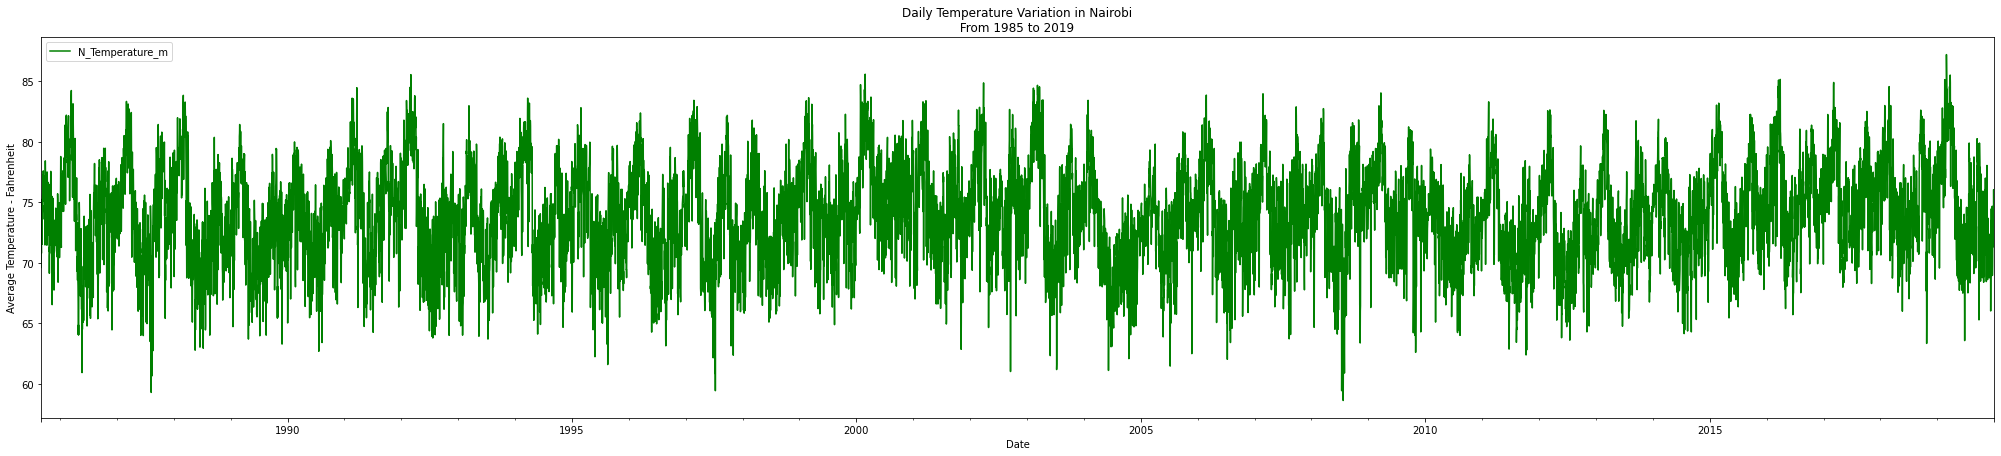

In [93]:
# Visualize some of the 'cleaned' data by plotting the daily avg temperature in Nairobi from 1985 to 2019
df_1985_2019['N_Temperature_m'].plot(figsize=(35,7), color="green")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Temperature - Fahrenheit')
plt.title("Daily Temperature Variation in Nairobi\n From 1985 to 2019 ")
plt.show()

<AxesSubplot:xlabel='timestamp'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Average Temperature - Fahrenheit')

Text(0.5, 1.0, 'Monthly Temperature Variation in Nairobi\n From 1985 to 2019 ')

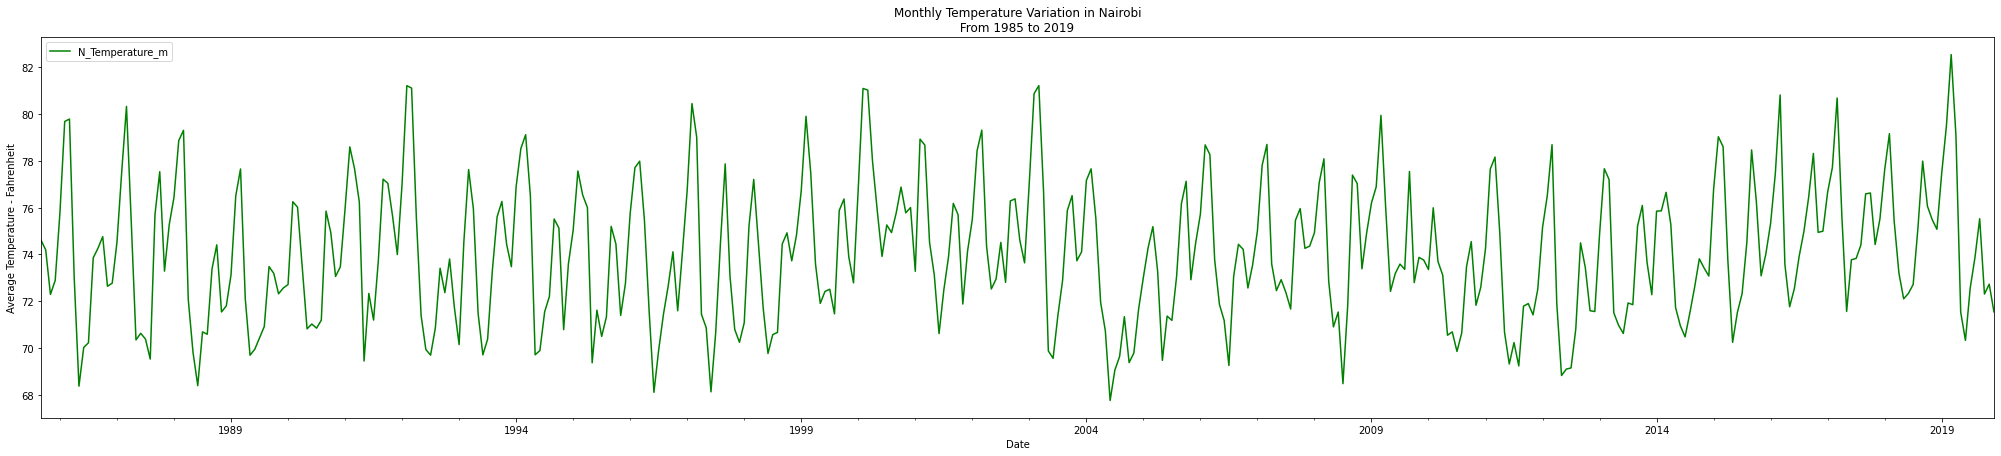

In [94]:
# Visualize some of the 'cleaned' data by plotting the monthly avg temperature in Nairobi from 1985 to 2019
df_1985_2019_monthly['N_Temperature_m'].plot(figsize=(35,7), color="green")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Temperature - Fahrenheit')
plt.title("Monthly Temperature Variation in Nairobi\n From 1985 to 2019 ")
plt.show()

In [95]:
df_1985_2019.columns

Index(['CO2 emissions (kt)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population, total_new', 'N_Temperature_m', 'N_Precipitation_Total'],
      dtype='object')

In [79]:
df_1985_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2 emissions (kt)_new,12540.0,9.589011e+03,4.502752e+03,3.762582e+03,6.138765e+03,7.492004e+03,1.263944e+04,1.889629e+04
Methane emissions (kt of CO2 equivalent)_new,12540.0,2.718258e+04,7.933472e+03,1.765098e+04,2.099878e+04,2.240219e+04,3.592981e+04,4.048676e+04
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,12540.0,1.286193e+04,3.679070e+03,7.951794e+03,1.010867e+04,1.067174e+04,1.708958e+04,1.876610e+04
"Population, total_new",12540.0,3.503651e+07,9.557250e+06,1.987707e+07,2.695051e+07,3.375175e+07,4.317827e+07,5.257397e+07
Urban population_new,12540.0,7.698468e+06,3.317847e+06,3.196030e+06,4.838154e+06,6.949824e+06,1.034940e+07,1.446153e+07
N_Temperature_m,12540.0,7.399937e+01,4.039017e+00,5.863105e+01,7.117705e+01,7.406604e+01,7.679304e+01,8.721504e+01
N_Precipitation_Total,12540.0,4.100485e-02,1.269044e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.755905e-02,3.283464e+00
N_Relative_Humidity_m,12540.0,9.063525e+01,6.758852e+00,5.000000e+01,8.600000e+01,9.200000e+01,9.600000e+01,1.000000e+02
N_Mean_Sea_Level_Pressure,12540.0,1.016996e+03,1.716440e+00,1.009800e+03,1.015800e+03,1.016900e+03,1.018100e+03,1.022800e+03
N_Soil_Moisture_10cm,12540.0,2.082956e-01,5.751675e-02,7.200000e-02,1.670000e-01,2.050000e-01,2.490000e-01,3.740000e-01


### Standardizing the magnitude of numeric features

In [153]:
scaler = preprocessing.StandardScaler()

In [154]:
scaled_df = scaler.fit_transform(df_1985_2019) 


In [155]:
scaled_df = pd.DataFrame(scaled_df, columns= {'CO2 emissions (kt)_new':'CO2 (kt)', 'Methane emissions (kt of CO2 equivalent)_new': 'Methane (kt)', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new':'Nitrous Oxide(kt)', 'Population, total_new':'Total Population','N_Temperature_m':'Temperature (DegF)','N_Precipitation_Total':'Precipitation (in)'}) 

In [156]:
df = scaled_df.rename(columns = {'CO2 emissions (kt)_new':'CO2 (kt)', 'Methane emissions (kt of CO2 equivalent)_new': 'Methane (kt)', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new':'Nitrous Oxide(kt)', 'Population, total_new':'Total Population','N_Temperature_m':'Temperature (DegF)','N_Precipitation_Total':'Precipitation (in)'})  

In [157]:
df.columns

Index(['CO2 (kt)', 'Methane (kt)', 'Nitrous Oxide(kt)', 'Total Population',
       'Temperature (DegF)', 'Precipitation (in)'],
      dtype='object')

In [164]:
df_1985_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2 emissions (kt)_new,12540.0,9.589011e+03,4.502752e+03,3.762582e+03,6.138765e+03,7.492004e+03,1.263944e+04,1.889629e+04
Methane emissions (kt of CO2 equivalent)_new,12540.0,2.718258e+04,7.933472e+03,1.765098e+04,2.099878e+04,2.240219e+04,3.592981e+04,4.048676e+04
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,12540.0,1.286193e+04,3.679070e+03,7.951794e+03,1.010867e+04,1.067174e+04,1.708958e+04,1.876610e+04
"Population, total_new",12540.0,3.503651e+07,9.557250e+06,1.987707e+07,2.695051e+07,3.375175e+07,4.317827e+07,5.257397e+07
N_Temperature_m,12540.0,7.399937e+01,4.039017e+00,5.863105e+01,7.117705e+01,7.406604e+01,7.679304e+01,8.721504e+01
N_Precipitation_Total,12540.0,4.100485e-02,1.269044e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.755905e-02,3.283464e+00


In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2 (kt),12540.0,-1.730921e-15,1.00004,-1.294022,-0.766283,-0.465735,0.677485,2.067103
Methane (kt),12540.0,2.208547e-15,1.00004,-1.201489,-0.779489,-0.602584,1.102616,1.677035
Nitrous Oxide(kt),12540.0,-1.825210e-15,1.00004,-1.334668,-0.748389,-0.595334,1.149152,1.604863
Total Population,12540.0,3.451713e-15,1.00004,-1.586235,-0.846094,-0.134434,0.851927,1.835064
Temperature (DegF),12540.0,8.121018e-16,1.00004,-3.805118,-0.698792,0.016508,0.691700,3.272133
Precipitation (in),12540.0,-4.890417e-15,1.00004,-0.323129,-0.323129,-0.323129,-0.105956,25.551430


Text(0.5, 1.0, 'CO2 distribution')

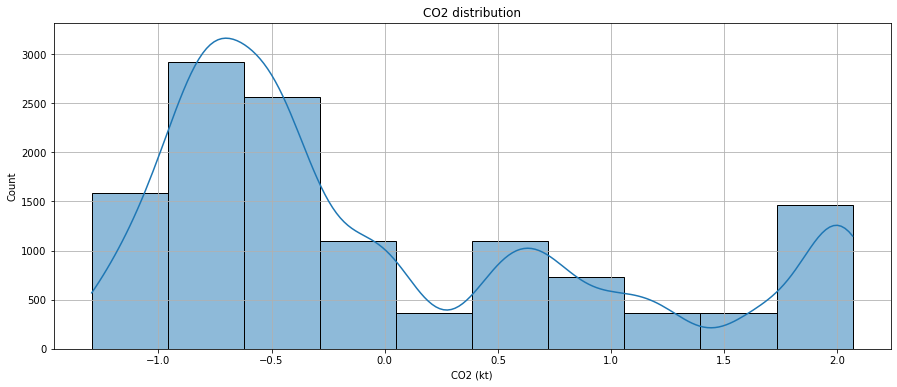

In [130]:
# Making a histogram of the CO2 variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['CO2 (kt)'], kde=True, bins=10)
ax.set_title('CO2 distribution')
plt.grid(True)

Text(0.5, 1.0, 'Methane distribution')

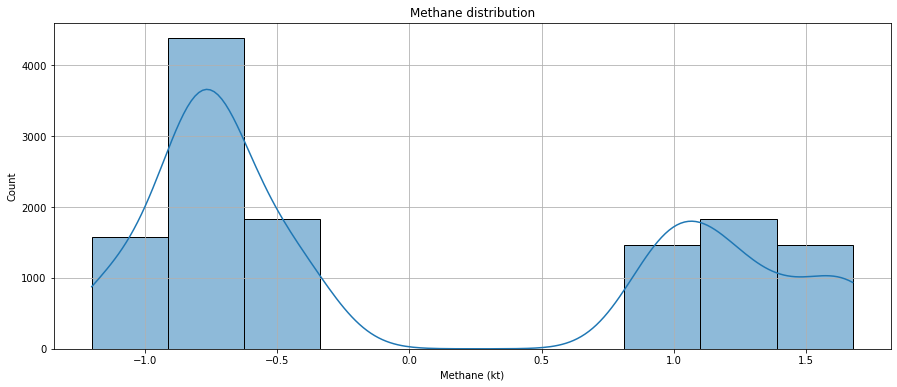

In [132]:
# Making a histogram of the Methane variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['Methane (kt)'], kde=True, bins=10)
ax.set_title('Methane distribution')
plt.grid(True)

Text(0.5, 1.0, 'Nitrous Oxide distribution')

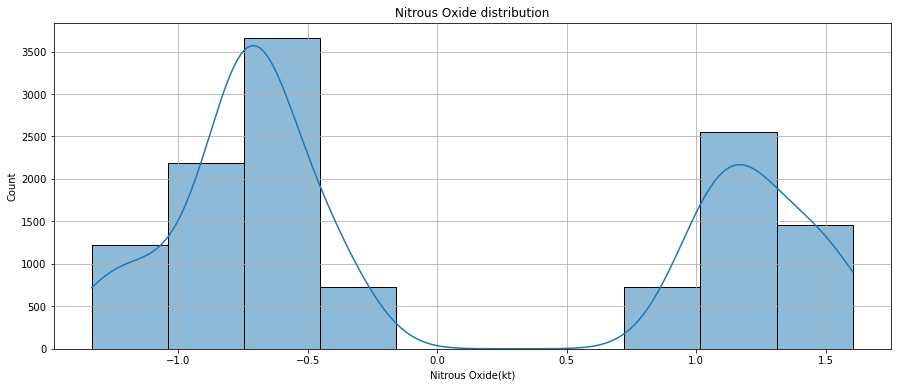

In [133]:
# Making a histogram of the CO2 variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['Nitrous Oxide(kt)'], kde=True, bins=10)
ax.set_title('Nitrous Oxide distribution')
plt.grid(True)

Text(0.5, 1.0, 'Total Population distribution')

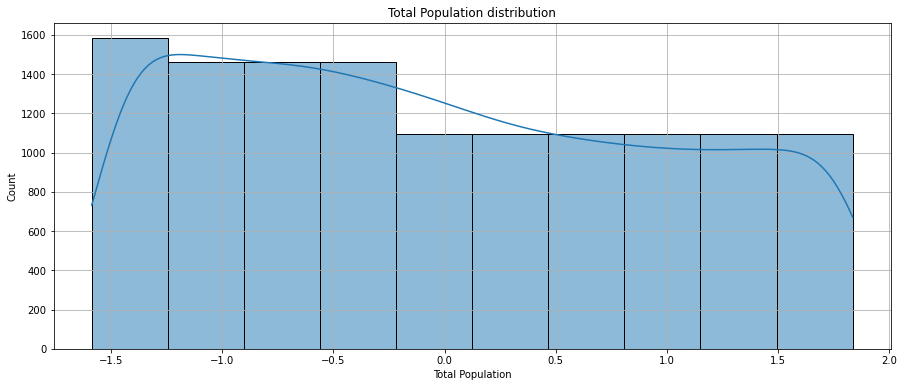

In [134]:
# Making a histogram of the CO2 variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['Total Population'], kde=True, bins=10)
ax.set_title('Total Population distribution')
plt.grid(True)

Text(0.5, 1.0, 'Temp distribution')

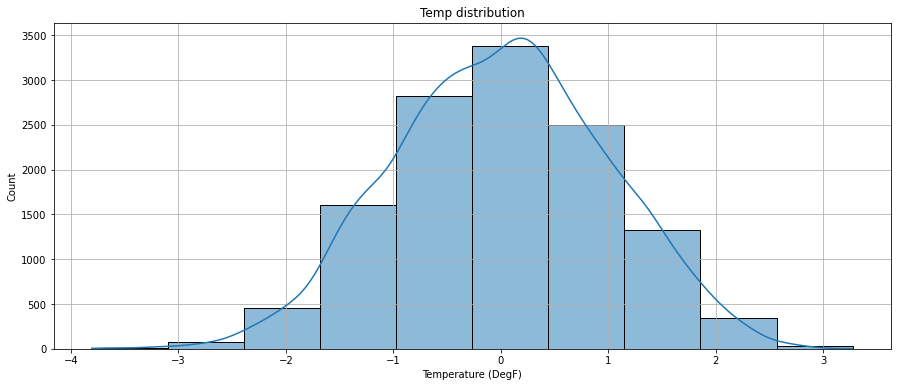

In [131]:
# Making a histogram of the Temperature variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['Temperature (DegF)'], kde=True, bins=10)
ax.set_title('Temp distribution')
plt.grid(True)

Text(0.5, 1.0, 'Precipitation distribution')

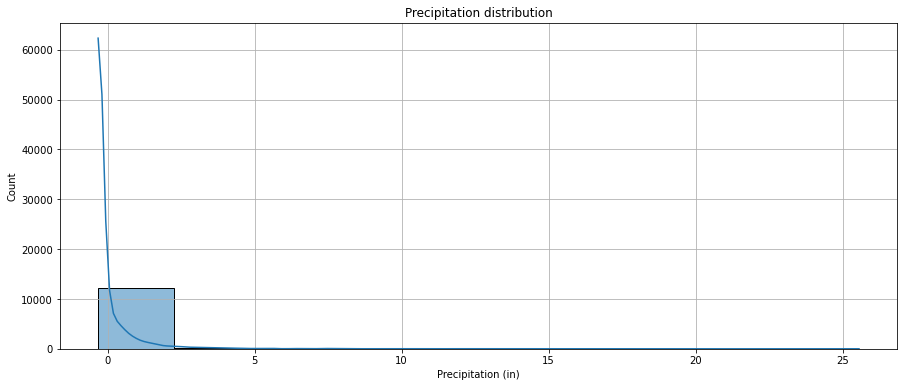

In [135]:
# Making a histogram of the CO2 variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['Precipitation (in)'], kde=True, bins=10)
ax.set_title('Precipitation distribution')
plt.grid(True)

In [167]:
pow_trans = PowerTransformer()

In [182]:
pow_trans.fit(df[['CO2 (kt)']])

PowerTransformer()

In [183]:
df['CO2 (kt)_2_LG'] = pow_trans.transform(df[['CO2 (kt)']])

In [186]:
pow_trans.fit(df[['Methane (kt)']]); df['Methane (kt)_LG'] = pow_trans.transform(df[['Methane (kt)']])

PowerTransformer()

In [188]:
pow_trans.fit(df[['Nitrous Oxide(kt)']]); df['Nitrous Oxide(kt)_LG'] = pow_trans.transform(df[['Nitrous Oxide(kt)']])

PowerTransformer()

In [191]:
pow_trans.fit(df[['Total Population']]); df['Total Population_LG'] = pow_trans.transform(df[['Total Population']])

PowerTransformer()

In [194]:
pow_trans.fit(df[['Temperature (DegF)']]); df['Temperature (DegF)_LG'] = pow_trans.transform(df[['Temperature (DegF)']])

PowerTransformer()

In [195]:
df

,CO2 (kt),Methane (kt),Nitrous Oxide(kt),Total Population,Temperature (DegF),Precipitation (in),CO2 (kt)_2,CO2 (kt)_2_LG,Methane (kt)_LG,Nitrous Oxide(kt)_LG,Total Population_LG,Temperature (DegF)_LG
0,-1.292613,-1.200718,-1.333081,-1.586234,-1.082071,-0.323129,PowerTransformer(),-1.967903,-1.558215,-1.706544,-1.719240,-1.079776
1,-1.292205,-1.200854,-1.333438,-1.586234,-0.591831,-0.323129,PowerTransformer(),-1.966895,-1.558495,-1.707220,-1.719240,-0.597831
2,-1.292758,-1.200769,-1.333507,-1.586234,-0.582920,-0.323129,PowerTransformer(),-1.968262,-1.558320,-1.707351,-1.719240,-0.589035
3,-1.292317,-1.201096,-1.332837,-1.586235,-0.792385,-0.323129,PowerTransformer(),-1.967171,-1.558993,-1.706083,-1.719240,-0.795440
4,-1.291938,-1.200972,-1.333359,-1.586234,-0.172903,-0.323129,PowerTransformer(),-1.966236,-1.558738,-1.707069,-1.719240,-0.182630
...,...,...,...,...,...,...,...,...,...,...,...,...
12535,1.957369,1.647049,1.485754,1.835063,-0.181815,0.545561,PowerTransformer(),1.582721,1.428018,1.350701,1.701623,-0.191502
12536,1.956994,1.647180,1.486669,1.835063,-0.587375,0.328389,PowerTransformer(),1.582575,1.428079,1.351199,1.701623,-0.593433
12537,1.956101,1.647064,1.486688,1.835063,0.508974,-0.292104,PowerTransformer(),1.582225,1.428025,1.351210,1.701623,0.502164
12538,1.957061,1.647675,1.486581,1.835063,-0.008004,-0.323129,PowerTransformer(),1.582601,1.428307,1.351151,1.701623,-0.018105


In [197]:
pow_trans.fit(df[['Precipitation (in)']]); df['Precipitation (in)_LG'] = pow_trans.transform(df[['Precipitation (in)']])

PowerTransformer()

array([[<AxesSubplot:title={'center':'CO2 (kt)'}>,
        <AxesSubplot:title={'center':'CO2 (kt)_2_LG'}>,
        <AxesSubplot:title={'center':'Methane (kt)'}>],
       [<AxesSubplot:title={'center':'Methane (kt)_LG'}>,
        <AxesSubplot:title={'center':'Nitrous Oxide(kt)'}>,
        <AxesSubplot:title={'center':'Nitrous Oxide(kt)_LG'}>],
       [<AxesSubplot:title={'center':'Total Population'}>,
        <AxesSubplot:title={'center':'Total Population_LG'}>,
        <AxesSubplot:title={'center':'Temperature (DegF)'}>],
       [<AxesSubplot:title={'center':'Temperature (DegF)_LG'}>,
        <AxesSubplot:title={'center':'Precipitation (in)'}>,
        <AxesSubplot:title={'center':'Precipitation (in)_LG'}>]],
      dtype=object)

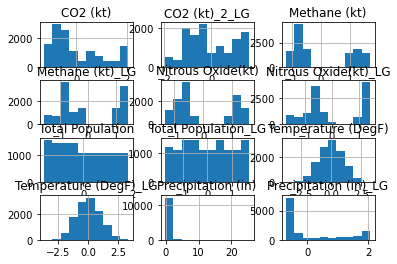

In [198]:
df[['CO2 (kt)','CO2 (kt)_2_LG', 'Methane (kt)', 'Methane (kt)_LG', 'Nitrous Oxide(kt)', 'Nitrous Oxide(kt)_LG','Total Population','Total Population_LG', 'Temperature (DegF)', 'Temperature (DegF)_LG', 'Precipitation (in)', 'Precipitation (in)_LG']].hist()

In [199]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2 (kt),12540.0,-1.730921e-15,1.00004,-1.294022,-0.766283,-0.465735,0.677485,2.067103
Methane (kt),12540.0,2.208547e-15,1.00004,-1.201489,-0.779489,-0.602584,1.102616,1.677035
Nitrous Oxide(kt),12540.0,-1.825210e-15,1.00004,-1.334668,-0.748389,-0.595334,1.149152,1.604863
Total Population,12540.0,3.451713e-15,1.00004,-1.586235,-0.846094,-0.134434,0.851927,1.835064
Temperature (DegF),12540.0,8.121018e-16,1.00004,-3.805118,-0.698792,0.016508,0.691700,3.272133
Precipitation (in),12540.0,-4.890417e-15,1.00004,-0.323129,-0.323129,-0.323129,-0.105956,25.551430
CO2 (kt)_2_LG,12540.0,9.865934e-16,1.00004,-1.971388,-0.811040,-0.280555,0.933428,1.624908
Methane (kt)_LG,12540.0,-4.778209e-16,1.00004,-1.559803,-0.761980,-0.470710,1.151709,1.441783
Nitrous Oxide(kt)_LG,12540.0,4.277457e-16,1.00004,-1.709545,-0.701966,-0.473463,1.157810,1.414512
Total Population_LG,12540.0,2.737753e-15,1.00004,-1.719240,-0.837135,-0.058697,0.875879,1.701624


In [200]:
df

,CO2 (kt),Methane (kt),Nitrous Oxide(kt),Total Population,Temperature (DegF),Precipitation (in),CO2 (kt)_2,CO2 (kt)_2_LG,Methane (kt)_LG,Nitrous Oxide(kt)_LG,Total Population_LG,Temperature (DegF)_LG,Precipitation (in)_LG
0,-1.292613,-1.200718,-1.333081,-1.586234,-1.082071,-0.323129,PowerTransformer(),-1.967903,-1.558215,-1.706544,-1.719240,-1.079776,-0.700926
1,-1.292205,-1.200854,-1.333438,-1.586234,-0.591831,-0.323129,PowerTransformer(),-1.966895,-1.558495,-1.707220,-1.719240,-0.597831,-0.700926
2,-1.292758,-1.200769,-1.333507,-1.586234,-0.582920,-0.323129,PowerTransformer(),-1.968262,-1.558320,-1.707351,-1.719240,-0.589035,-0.700926
3,-1.292317,-1.201096,-1.332837,-1.586235,-0.792385,-0.323129,PowerTransformer(),-1.967171,-1.558993,-1.706083,-1.719240,-0.795440,-0.700926
4,-1.291938,-1.200972,-1.333359,-1.586234,-0.172903,-0.323129,PowerTransformer(),-1.966236,-1.558738,-1.707069,-1.719240,-0.182630,-0.700926
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12535,1.957369,1.647049,1.485754,1.835063,-0.181815,0.545561,PowerTransformer(),1.582721,1.428018,1.350701,1.701623,-0.191502,1.835934
12536,1.956994,1.647180,1.486669,1.835063,-0.587375,0.328389,PowerTransformer(),1.582575,1.428079,1.351199,1.701623,-0.593433,1.691935
12537,1.956101,1.647064,1.486688,1.835063,0.508974,-0.292104,PowerTransformer(),1.582225,1.428025,1.351210,1.701623,0.502164,-0.423082
12538,1.957061,1.647675,1.486581,1.835063,-0.008004,-0.323129,PowerTransformer(),1.582601,1.428307,1.351151,1.701623,-0.018105,-0.700926


In [202]:
df_LG = df[['CO2 (kt)_2_LG',
       'Methane (kt)_LG',
       'Nitrous Oxide(kt)_LG',
       'Total Population_LG', 'Temperature (DegF)_LG', 
       'Precipitation (in)_LG'

                    ]];


df_LG.head();
df_LG.describe().T

,CO2 (kt)_2_LG,Methane (kt)_LG,Nitrous Oxide(kt)_LG,Total Population_LG,Temperature (DegF)_LG,Precipitation (in)_LG
0,-1.967903,-1.558215,-1.706544,-1.71924,-1.079776,-0.700926
1,-1.966895,-1.558495,-1.707220,-1.71924,-0.597831,-0.700926
2,-1.968262,-1.558320,-1.707351,-1.71924,-0.589035,-0.700926
3,-1.967171,-1.558993,-1.706083,-1.71924,-0.795440,-0.700926
4,-1.966236,-1.558738,-1.707069,-1.71924,-0.182630,-0.700926


,count,mean,std,min,25%,50%,75%,max
CO2 (kt)_2_LG,12540.0,9.865934e-16,1.00004,-1.971388,-0.811040,-0.280555,0.933428,1.624908
Methane (kt)_LG,12540.0,-4.778209e-16,1.00004,-1.559803,-0.761980,-0.470710,1.151709,1.441783
Nitrous Oxide(kt)_LG,12540.0,4.277457e-16,1.00004,-1.709545,-0.701966,-0.473463,1.157810,1.414512
Total Population_LG,12540.0,2.737753e-15,1.00004,-1.719240,-0.837135,-0.058697,0.875879,1.701624
Temperature (DegF)_LG,12540.0,1.227410e-16,1.00004,-3.711125,-0.703304,0.006415,0.687385,3.347446
Precipitation (in)_LG,12540.0,1.033501e-14,1.00004,-0.700926,-0.700926,-0.700926,0.754321,2.070658


### Train and Test Split

In [207]:
# Let's define our features:
features = ['CO2 (kt)_2_LG',
       'Methane (kt)_LG',
       'Nitrous Oxide(kt)_LG',
       'Total Population_LG',]
predictions = ['Temperature (DegF)_LG', 
       'Precipitation (in)_LG']
X=df_LG[features];
y = df_LG[predictions]

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [209]:
df_LG[predictions].count()

Temperature (DegF)_LG    12540
Precipitation (in)_LG    12540
dtype: int64